# AllLife Bank Customer Segmentation 

### Context
`AllLife Bank` wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.



### Objective
To `identify different segments` in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and `provide recommendations` to the bank on how to better market to and service these customers.

 


### Data Description
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).


### Data Dictionary

* Sl_No: Primary key of the records
* Customer Key: Customer identification number
* Average Credit Limit: Average credit limit of each customer for all credit cards
* Total credit cards: Total number of credit cards possessed by the customer
* Total visits bank: Total number of visits that customer made (yearly) personally to the bank
* Total visits online: Total number of visits or online logins made by the customer (yearly)
* Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)


## Solution Approach


* **Understand given data from bank**
    * Check for Size/Duplicates/Null values/Sample data
   

* **Exploratory Data Analysis and Insights**
    * Univariate analysis
    * Bivariate analysis - 
    * List all Key meaningful observations


* **Data pre-processing**
    * Prepare the data for analysis
    * Feature Engineering
    * Missing value Treatment
    * Outlier Treatment


* **Cluster customers - K-means Clustering**
    
* **Cluster customers - Hierarchical Clustering**

* **Actionable Insights & Recommendations**
   * Business recommendations and insights


# Solution



## Understand Given Data

Load given data `Dataset - Credit Card Customer Data.xlsx` to data frame and understand data, data type, data nature,  features incuded, total records,data has any missing values or duplicate data, outliers. 

Visualize data and and understand data range and detect outliers 

### Loading necessary libraries for  EDA

Load all standard python library packages.

#### Data Manipulation
* Numpy
* Pandas

#### Data Visualization
* matplotlib.pyplot
* seaborn



In [1]:

# this will help in making the Python code more structured automatically
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)



<IPython.core.display.Javascript object>

## Load data to dataframe

Read given xlsx file `Credit Card Customer Data.xlsx` and load to data frame `bankdata`.

In [2]:
%%time
# reading csv data given from bank and load to data frame
bank_data = pd.read_excel("Credit Card Customer Data.xlsx")
# copying orignal data so that when changing data we dont lose original
data = bank_data.copy()

CPU times: user 124 ms, sys: 12.1 ms, total: 136 ms
Wall time: 163 ms


<IPython.core.display.Javascript object>

In [3]:
# fixing column names
data.columns = [c.replace(" ", "_") for c in data.columns]

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [4]:
data.head(5)

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


<IPython.core.display.Javascript object>

In [5]:
data.tail(5)

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


<IPython.core.display.Javascript object>

**All numerical features, SI_NO is row number, Customer Key is unique customer ID** 

### Understand the shape of the dataset.

In [6]:
data.shape

(660, 7)

<IPython.core.display.Javascript object>

**Observations on data** 

* **All numerical features, SI_NO is row number, Customer Key is unique customer ID** 
* Total 660 records and 7 features, Where 2 features are unique,  SI_NO is row number, Customer Key is unique customer ID can be dropped for initial data exploration and model building. 
* These is no dependent feature, We are trying to group customers of similar intrest, Thoese groups/clusters will be the dependent feature that we will derive

### Check the data types of the columns in the dataset.

checking data types and data summary of all columns 



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer_Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<IPython.core.display.Javascript object>

### Check data summary

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer_Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


<IPython.core.display.Javascript object>

In [9]:
# checking customer key is unqiue or not
data["Customer_Key"].value_counts()

50706    2
37252    2
97935    2
96929    2
47437    2
        ..
58708    1
92501    1
33110    1
92503    1
75775    1
Name: Customer_Key, Length: 655, dtype: int64

<IPython.core.display.Javascript object>

**Observations on data summary** 

* All features are numerical
* Data has no missing data/features

* Sl_No: Primary key of the records - can be dropped
* Customer Key: Customer identification number - has some repeated values, we have to check those values are duplicate or not and decide to drop or not.

* Avg_Credit_Limit - data range from `3K to 200K` looks like right skewed data and has outliers, we have to check those values are valid values or not.

* Total_Credit_Cards - data range from `1 to 10` and looks like right skewed data and has outliers, we have to check those values are valid values or not.

* Total_visits_bank - - data range from `0 to 5`, Looks like no outliers in data

* Total_visits_online - data range from `0 to 15` and looks like right skewed data and has outliers, we have to check those values are valid values or not.
* Total_calls_made - data range from `0 to 10` and looks like right skewed data and has outliers, we have to check those values are valid values or not.


### Drop Sl_No Column

Since Sl_No has no relation with other features and it is row number we can drop this column

In [10]:
# Drop Sl_No Columns
data.drop("Sl_No", axis=1, inplace=True)

<IPython.core.display.Javascript object>


### Checking for missing values

lets check which columns has some null values, how many null values

In [11]:
#  Prints total null value count(s) for all columns in input data frame
def print_null_info(df):
    """
    Prints total null value count(s) & % for all columns in input data frame
    """

    nullInfo = {"missing count": df.isnull().sum(), "missing %": df.isnull().mean()}
    # Creates pandas DataFrame.
    nulldata = pd.DataFrame(nullInfo)
    return nulldata[nulldata["missing count"] > 0].sort_values(
        by="missing count", ascending=False
    )


#    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
def print_category_value_counts(df, column_names):
    """
    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
    """
    print()
    for typeval, col in zip(df[column_names].dtypes, df[column_names]):
        print()
        print(f"Column name : {col} has total {df[col].nunique()} unique values")
        print()
        print(df[col].value_counts()[0:10])
        print()
        print("-" * 50)


print_null_info(data)

,missing count,missing %


<IPython.core.display.Javascript object>

**No Missing Values** 


###  Checking for Duplicates Values
lets check for any duplicate values


In [12]:
# check for any duplicate data
data[data.duplicated()]

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


<IPython.core.display.Javascript object>

**No Duplicate Data found, But we know Customer Key has some repeat values lets check those values.**


In [13]:
category_cols = [
    "Customer_Key",
]
print_category_value_counts(data, category_cols)



Column name : Customer_Key has total 655 unique values

50706    2
37252    2
97935    2
96929    2
47437    2
49331    1
72339    1
58511    1
20119    1
66200    1
Name: Customer_Key, dtype: int64

--------------------------------------------------


<IPython.core.display.Javascript object>

**655 unique customers, 5 customer has more than 1 data**

In [14]:
# list all customer has Customer_Key more than 1
grouped = data.groupby("Customer_Key")
grouped.filter(lambda x: x["Customer_Key"].count() > 1).sort_values(by="Customer_Key")

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,37252,6000,4,0,2,8
432,37252,59000,6,2,1,2
4,47437,100000,6,0,12,3
332,47437,17000,7,3,1,0
411,50706,44000,4,5,0,2
541,50706,60000,7,5,2,2
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2
104,97935,17000,2,1,2,10
632,97935,187000,7,1,7,0


<IPython.core.display.Javascript object>

**Observations on duplicate Data** 

As per `FAQ section about 'Customer Key'` is a unique ID given to each customer in the database. The duplicate values might correspond to customer profile changes, and as such, there is no need to delete these records as these are actual occurrences at some point in the time.

* We have 2 options leave them as it is since its only 5 records and both customer key might fall in diffrent segmentaions or keep the latest record as per row number and delete other. We can keep these records.

**Keeping duplicate Data, Since all data are valid** 



### Drop Customer_Key Column

Since Customer_Key has no relation with other features and it is row number we can drop this column

In [15]:
%%time
data_original = data.copy()
# Drop Sl_No Columns
data.drop("Customer_Key", axis=1, inplace=True)

CPU times: user 531 µs, sys: 29 µs, total: 560 µs
Wall time: 548 µs


<IPython.core.display.Javascript object>

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


<IPython.core.display.Javascript object>

# Exploratory Data Analysis And Data processing 

## Univariate analysis & Bivariate analysis 

Visualize all features before any data clean up and understand what data needs cleaning and fixing.

###  Analysis on features
Univariate analysis helps to check data skewness and possible outliers and spread of the data.
Bivariate analysis helps to check data relation between two features.

**creating common methods that can plot univariate chart with histplot, boxplot and barchart %**

In [17]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [18]:
## this method generate joint plot of x vs y feature
def generate_bivariate_chart(data, xfeature, yfeature, hue=None):
    """
    common method to generate joint plot for various columns
    hue param is optional
    """
    sns.set_style("darkgrid")
    print(f"Genrating Charts for feature x : {xfeature}, y : {yfeature}")

    sns.jointplot(
        data=data,
        x=xfeature,
        y=yfeature,
        palette="deep",
        height=10,
        kind="scatter",
        hue=hue,
    )

<IPython.core.display.Javascript object>

In [19]:

# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


<IPython.core.display.Javascript object>

In [20]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


<IPython.core.display.Javascript object>

In [21]:
# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()


<IPython.core.display.Javascript object>

### Checking data outliers -  outside IQR  - 3*IQR Range

In [22]:
 # writing a method that can take a column as input and print all the values falling outside the range of Limts of IQR 
def check_outlier_using_IQR(column, limit=3):
    """
    Check Limts * IQR for each values and prints the ones falls outside the range.
    """
    quartiles = np.quantile(data[column][data[column].notnull()], [0.25, 0.75])
    limit_iqr = limit * (quartiles[1] - quartiles[0])
    outlier = data.loc[np.abs(data[column] - data[column].median()) > limit_iqr, column]
    print();
    print(f"Column : {column} Outlier(s) check");
    print(f"Mean : {data[column].mean()}, Median : {data[column].median()}, Min : {data[column].min()}, Max : {data[column].max()}");
    print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, {limit}*IQR = {limit_iqr}, Total Outlier(s) : {outlier.size} \n")
    if outlier.size > 10:
        print(f"listing 10 sample outliers");
        print(outlier.sample(10))
    else:
        print(f"listing all outliers");
        print(outlier)
    print("-" * 50)



<IPython.core.display.Javascript object>

###  Analysis on Avg_Credit_Limit

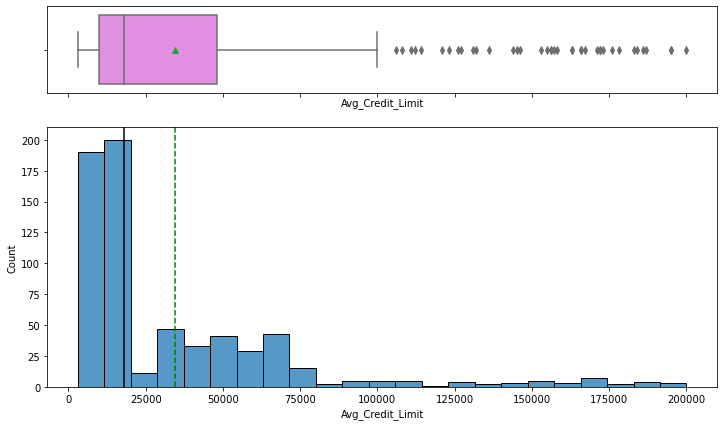

<IPython.core.display.Javascript object>

In [23]:
# Observations on Avg_Credit_Limit
histogram_boxplot(data, "Avg_Credit_Limit")

### Observations on Avg_Credit_Limit

* Data ranges from `3K to 200K`, Mean is around 18K, 75% is around 48K
* Avg_Credit_Limit right skewed, with lot of outliers shown as per box plot. We need to investigate outliers 
* Median and Mean has difference because of right skewness & outliers 
* more than 90% of customer has credit limit less than 100K


**Checking Outliers**

In [24]:
# checking outliers falls outside 3 times IQR Range
check_outlier_using_IQR("Avg_Credit_Limit", 3)


Column : Avg_Credit_Limit Outlier(s) check
Mean : 34574.242424242424, Median : 18000.0, Min : 3000, Max : 200000
Q1 = 10000.0, Q3 = 48000.0, 3*IQR = 114000.0, Total Outlier(s) : 28 

listing 10 sample outliers
646    186000
621    166000
624    178000
650    195000
622    176000
614    163000
637    173000
638    153000
654    172000
617    136000
Name: Avg_Credit_Limit, dtype: int64
--------------------------------------------------


<IPython.core.display.Javascript object>

In [25]:
# check outlier data for decision
data[data["Avg_Credit_Limit"] >= 136000].sample(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
652,156000,8,1,8,0
631,195000,8,0,15,0
612,157000,9,1,14,1
629,155000,8,0,7,2
657,145000,8,1,9,1
614,163000,8,1,7,1
624,178000,7,0,11,0
645,171000,10,0,15,0
639,184000,7,1,15,2
632,187000,7,1,7,0


<IPython.core.display.Javascript object>

Genrating Charts for feature x : Avg_Credit_Limit, y : Total_Credit_Cards


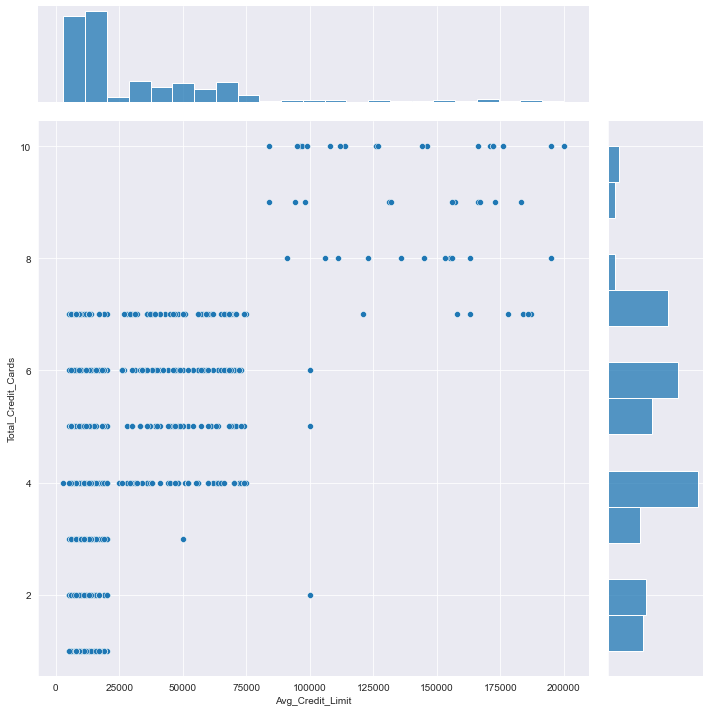

<IPython.core.display.Javascript object>

In [26]:
# check Avg_Credit_Limit and Total_Credit_Cards, More credit cards increase credit limit ot not

generate_bivariate_chart(
    xfeature="Avg_Credit_Limit", yfeature="Total_Credit_Cards", data=data, hue=None,
)

**Observation on Outliers**

* 28 Customers falls beyound 3 IQR Range, But all those customers own more than 7 credit cards so, naturally their credit limit will be higher. 

* As per Avg_Credit_Limit vs Total_Credit_Cards chart its clear Avg_Credit_Limit increses when customer own more credit cards. This proves the data shown as outliers are valid data. We dont need to take any action on those outlier data. 

* `No Outlier Treatment Required`

###  Analysis on Total_Credit_Cards

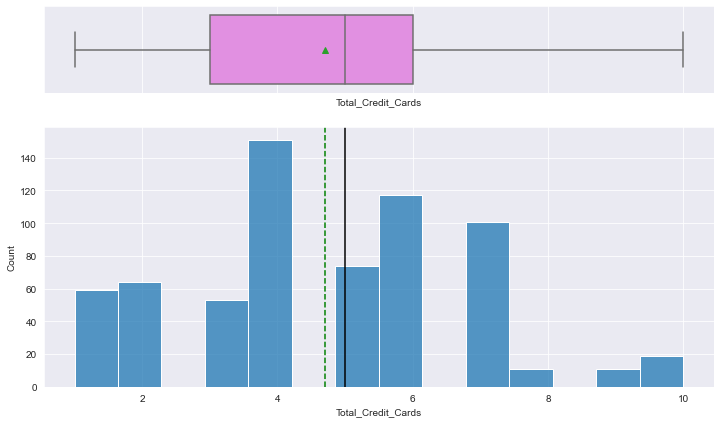

<IPython.core.display.Javascript object>

In [27]:
# Observations on Total_Credit_Cards
histogram_boxplot(data, "Total_Credit_Cards")

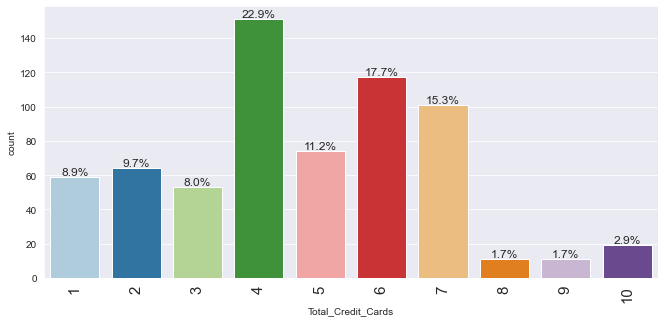

<IPython.core.display.Javascript object>

In [28]:
# Observations on Total_Credit_Cards
labeled_barplot(data, "Total_Credit_Cards", True)

### Observations on Total_Credit_Cards

* Data ranges from `1 to 10`, Mean is 5, 75% is 6 cards 
* No Data Skewness or No outliers shown 
* Approx 65% customers has 4 to 7 credit cards and close to 28% customer has 1 to 3 credit cards 
* 95% customers has 7 or less credit cards 
* Only very few customer share% own 8 to 10 credit cards 
* We already noticeed Total_Credit_Cards has high corelation with Credit limit, Customer owning high number of credit cards have high credit limit. 

###  Analysis on Total_visits_bank

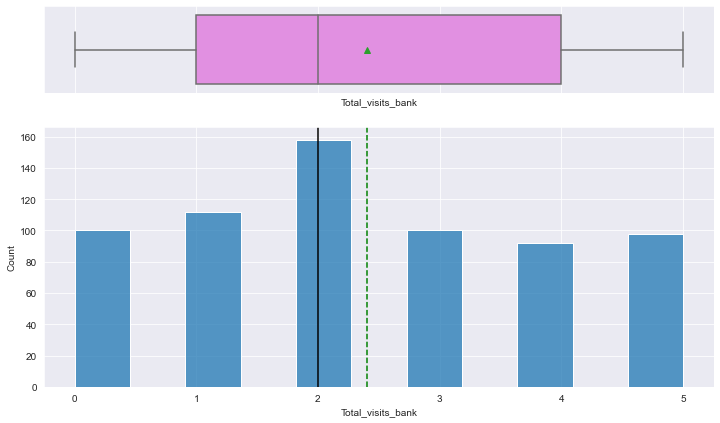

<IPython.core.display.Javascript object>

In [29]:
# Observations on Total_visits_bank
histogram_boxplot(data, "Total_visits_bank")

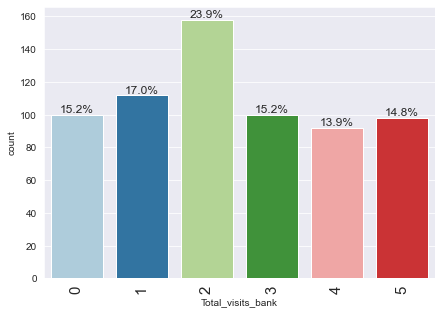

<IPython.core.display.Javascript object>

In [30]:
# Observations on Total_visits_bank
labeled_barplot(data, "Total_visits_bank", True)

### Observations on Total_visits_bank

* Data ranges from `0 to 5` visits, Mean is 2 visits, 75% is 4 visits 
* Data evenly distributed and no skewness or outliers detected.
* 24% customers visit 2 times bank yearly, Otherwise all other visit count range from 0 to 5 falls within 15% 

###  Analysis on Total_visits_online

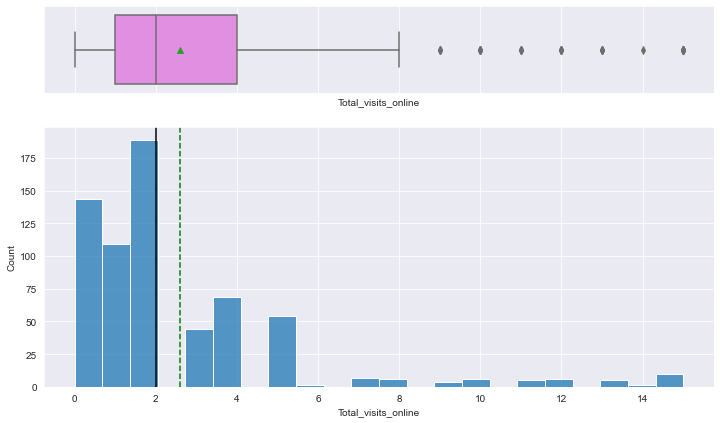

<IPython.core.display.Javascript object>

In [31]:
# Observations on Total_visits_online
histogram_boxplot(data, "Total_visits_online")

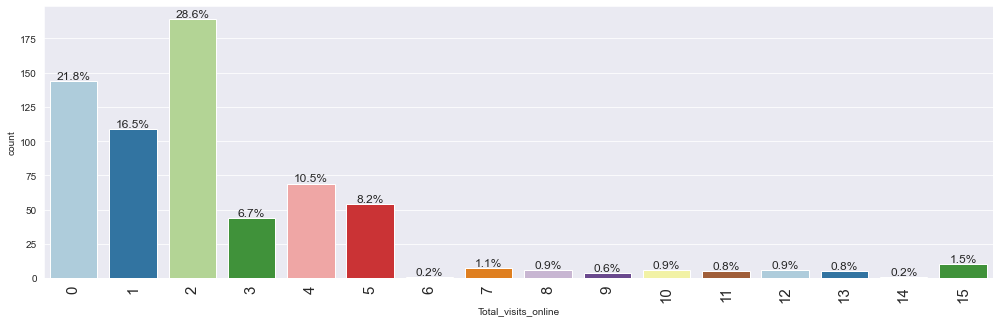

<IPython.core.display.Javascript object>

In [32]:
# Observations on Total_visits_online
labeled_barplot(data, "Total_visits_online", True)

### Observations on Total_visits_online

* Data ranges from `0 to 15` visits, Mean is 2 visits, 75% is 4 visits, Max is 15 which clear shows data has outliers
* Data is right skewed and show lot of outliers 
* 90% customers visit 5 or less visits online visits.
* 22% customers never visit online banking.

**Checking Outliers**


In [33]:
# checking outliers falls outside 3 times IQR Range
check_outlier_using_IQR("Total_visits_online", 3)


Column : Total_visits_online Outlier(s) check
Mean : 2.606060606060606, Median : 2.0, Min : 0, Max : 15
Q1 = 1.0, Q3 = 4.0, 3*IQR = 9.0, Total Outlier(s) : 22 

listing 10 sample outliers
659    12
630    13
621    12
618    13
658    15
639    15
612    14
650    12
620    15
627    12
Name: Total_visits_online, dtype: int64
--------------------------------------------------


<IPython.core.display.Javascript object>

In [34]:
# check outlier data for decision
data[data["Total_visits_online"] >= 10].sample(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
616,96000,10,1,11,2
613,94000,9,1,11,0
624,178000,7,0,11,0
620,108000,10,0,15,1
633,163000,7,1,10,1
637,173000,9,1,11,0
618,121000,7,0,13,2
619,158000,7,0,13,0
645,171000,10,0,15,0
653,95000,10,0,15,1


<IPython.core.display.Javascript object>

**Observation on Outliers**

* Online visits are high for customers does not visit bank or high credit card counts, And they might be checking online banking for statements or purchase history or for making payments.

* Online visit is not a crucial data so these we can leave these data as it is. All data looks valid.

* `No Outlier Treatment Required`

###  Analysis on Total_calls_made

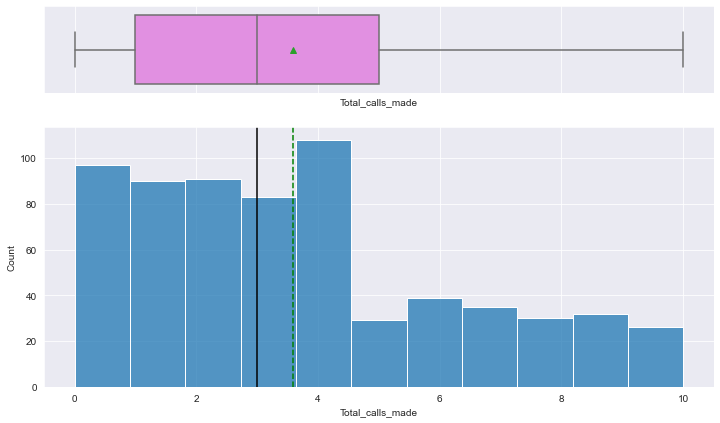

<IPython.core.display.Javascript object>

In [35]:
# Observations on Total_calls_made
histogram_boxplot(data, "Total_calls_made")

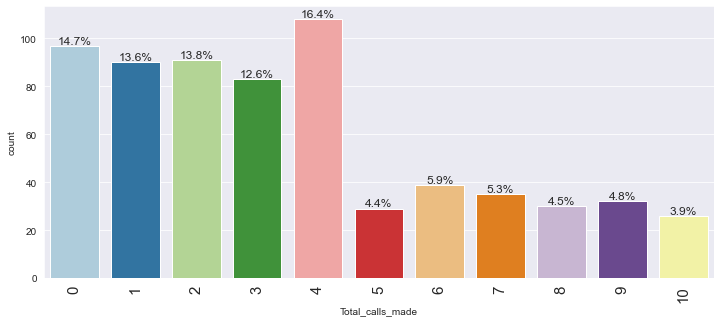

<IPython.core.display.Javascript object>

In [36]:
# Observations on Total_calls_made
labeled_barplot(data, "Total_calls_made", True)

### Observations on Total_calls_made


* Data ranges from `0 to 10`, Mean is 3 calls, 75% is 5 calls made. 
* No Data Skewness or No outliers shown 
* Approx 50% customers makes 1 to 4 calls per year.
* Only very few customer calls more than 5 times. 
* 15% customers never calls bank.

## Bivariate Analysis
### Data correlation analysis - Heatmap

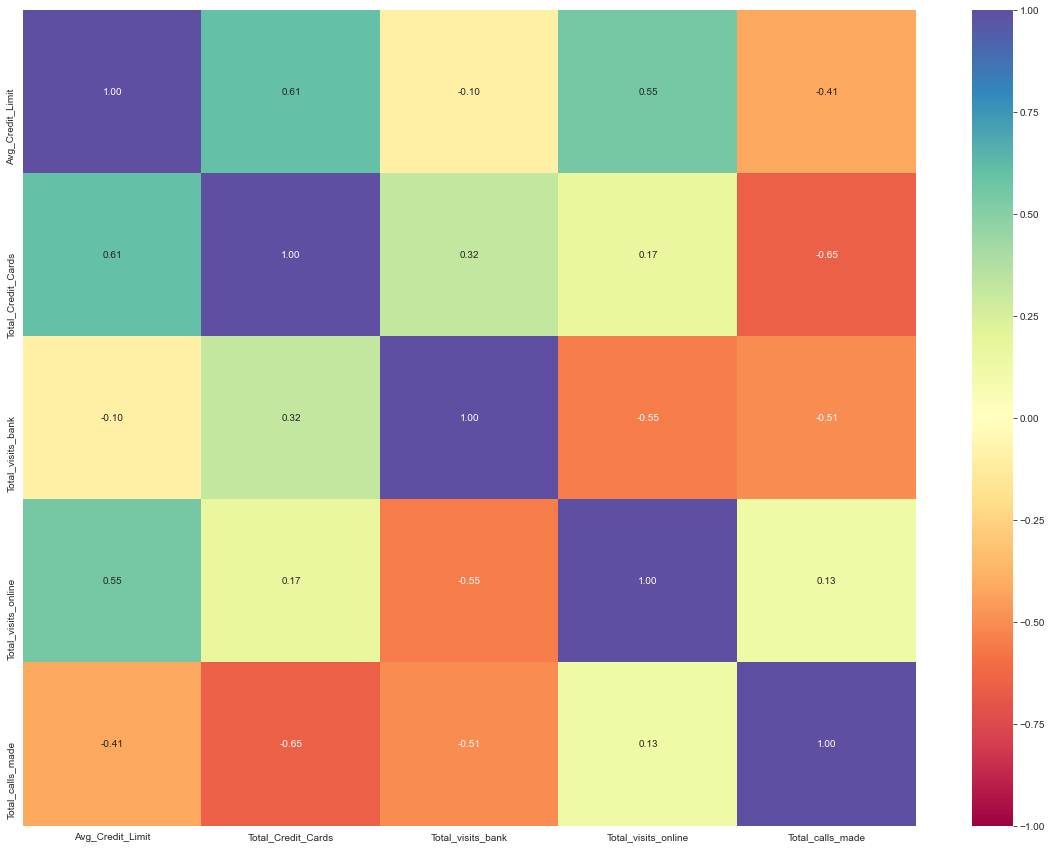

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Key Observations on Data correlation 

* we already observered high credit limit is realted with owns high number of credit cards, That is been shown again 61% corelation between Average Credit Limit and Total Credit cards 

* We see 55% corelation between Average Credit Limit and Total Online visits, Looks like customers with high avg credit limit vists online often compared to low credit limit.

* Total_Visits_Banks shows 50% Negative corelation with Total Visits online or Total Calls made, This make sense when they viist bank their questions get answered so no online visit or calls required.

### Pair Plot analysis

<Figure size 2160x1080 with 0 Axes>

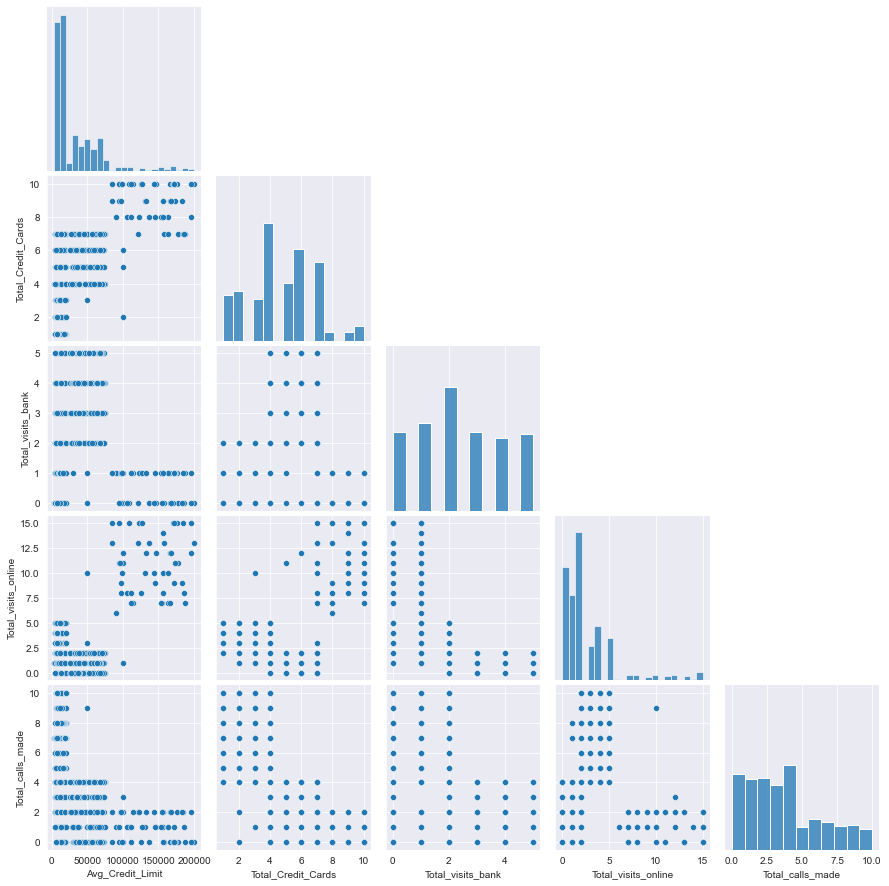

<IPython.core.display.Javascript object>

In [38]:
plt.figure(figsize=(30, 15))
sns.pairplot(data, corner=True, palette="deep")
plt.show()

Genrating Charts for feature x : Total_visits_online, y : Total_calls_made


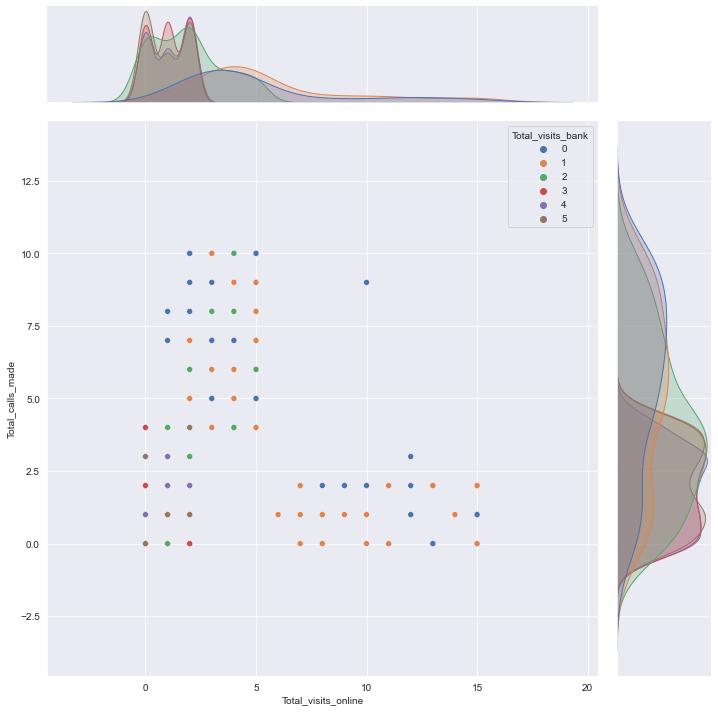

<IPython.core.display.Javascript object>

In [39]:
# Checking Total Online visits, and Total Calls Made with Total Bank visits
generate_bivariate_chart(
    xfeature="Total_visits_online",
    yfeature="Total_calls_made",
    data=data,
    hue="Total_visits_bank",
)

**Observations** 

* less online visits has hgh calls being made to bank
* high online visits has low calls to bank
* high visit to bank less calls and less online visits

### Key Observations on Pair Plot

* We already observered high credit limit is realted with owns high number of credit cards and High online visits, That is been shown again, Similar pattern is observered with total credit cards and online visits. 

* Avg_Credit_limit shows shows a decent relation with Totals calls made, We already saw customers with high credit limit do online visits more likewise customers with low avg credit limit shows making lot of calls to bank, Similar pattern is observred on credit cards, customers with less credit cards makes more phone calls to bank than online visits.

* Total Visits Banks show negative relation with Total Visits online and Total Calls Made, This make sense when they viist bank their questions get answered so no online visit or calls required.




## Feature Engineering 

Creating new features using existing numerical features to understand about customer segments 

### New Features extracted from existing numerical features

**Note: We are not going to use these new features to cluster customer, We just need these to understand their segmentaion more** 


In [40]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


<IPython.core.display.Javascript object>

In [41]:
# Boolean feature yes/no, customers holds more credit cards or not
data["Has_More_Cards"] = data["Total_Credit_Cards"].apply(
    lambda x: "Yes" if x >= 8 else "No"
)

# Boolean feature yes/no, customer do online visits more or not
data["Prefers_Online_Banking"] = data["Total_visits_online"].apply(
    lambda x: "Yes" if x >= 8 else "No"
)

# Boolean feature yes/no, customer calls bank more or not
data["Prefers_Calling_Bank"] = data["Total_calls_made"].apply(
    lambda x: "Yes" if x >= 6 else "No"
)

# Boolean feature yes/no, customer calls bank more or not
data["Prefers_Visiting_Bank"] = data["Total_visits_bank"].apply(
    lambda x: "Yes" if x >= 4 else "No"
)

category_cols = [
    "Has_More_Cards",
    "Prefers_Online_Banking",
    "Prefers_Calling_Bank",
    "Prefers_Visiting_Bank",
]

data[category_cols] = data[category_cols].astype("category")


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Avg_Credit_Limit        660 non-null    int64   
 1   Total_Credit_Cards      660 non-null    int64   
 2   Total_visits_bank       660 non-null    int64   
 3   Total_visits_online     660 non-null    int64   
 4   Total_calls_made        660 non-null    int64   
 5   Has_More_Cards          660 non-null    category
 6   Prefers_Online_Banking  660 non-null    category
 7   Prefers_Calling_Bank    660 non-null    category
 8   Prefers_Visiting_Bank   660 non-null    category
dtypes: category(4), int64(5)
memory usage: 29.0 KB


<IPython.core.display.Javascript object>

#### Customer segmentaion with more credit cards

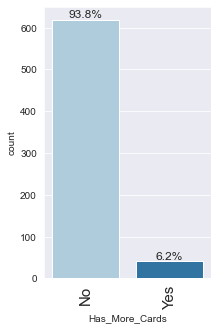

<IPython.core.display.Javascript object>

In [42]:
# let's explore Has_More_Cards
labeled_barplot(data, "Has_More_Cards", perc=True)

* We have 39% customers has more credit cards than avg 

#### Customer segmentaion likes online banking

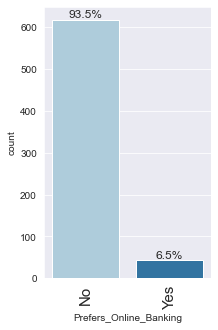

<IPython.core.display.Javascript object>

In [43]:
# let's explore Prefers_Online_Banking
labeled_barplot(data, "Prefers_Online_Banking", perc=True)

* We have 33% customers perfer to do online banking


#### Customer segmentaion likes phone banking

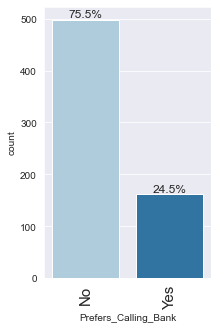

<IPython.core.display.Javascript object>

In [44]:
# let's explore Prefers_Calling_Bank
labeled_barplot(data, "Prefers_Calling_Bank", perc=True)

* We have 45% customers perfer to do phone banking

#### Customer segmentaion likes to visit bank in person

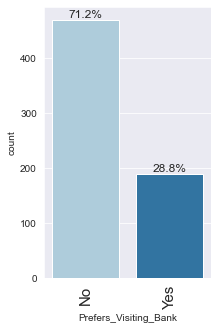

<IPython.core.display.Javascript object>

In [45]:
# let's explore Prefers_Visiting_Bank
labeled_barplot(data, "Prefers_Visiting_Bank", perc=True)

* We have 44% customers perfer to visit bank in person to get their questions answered or issues resolved

### Checking Customers with more credit cards perfers online banking or not  

Prefers_Online_Banking   No  Yes  All
Total_Credit_Cards                   
All                     617   43  660
10                        2   17   19
9                         0   11   11
7                        95    6  101
8                         5    6   11
3                        52    1   53
5                        73    1   74
6                       116    1  117
1                        59    0   59
2                        64    0   64
4                       151    0  151
------------------------------------------------------------------------------------------------------------------------


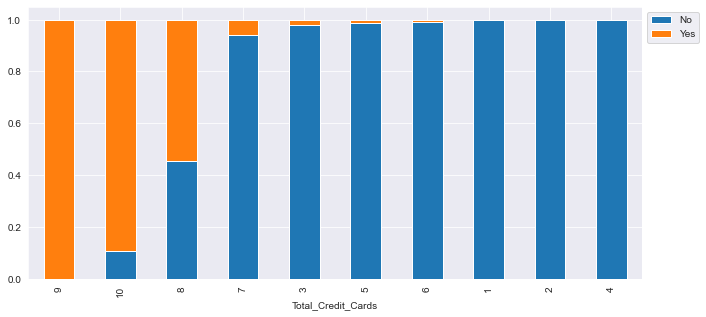

<IPython.core.display.Javascript object>

In [46]:
stacked_barplot(data, "Total_Credit_Cards", "Prefers_Online_Banking")


**Observations** 

* We can see very clearly customers holds more credit cards prefer online banking 
* Also we see customer with 1 to 3 credit card also perfer online banking


### Checking Customers with more credit cards perfers calling the bank or not

Prefers_Calling_Bank   No  Yes  All
Total_Credit_Cards                 
All                   498  162  660
1                      14   45   59
2                      21   43   64
3                      16   37   53
4                     114   37  151
5                      74    0   74
6                     117    0  117
7                     101    0  101
8                      11    0   11
9                      11    0   11
10                     19    0   19
------------------------------------------------------------------------------------------------------------------------


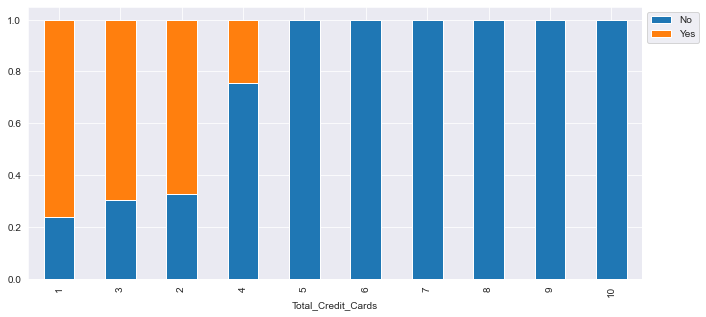

<IPython.core.display.Javascript object>

In [47]:
stacked_barplot(data, "Total_Credit_Cards", "Prefers_Calling_Bank")

**Observations** 


* customer with less credit cards 1 to 4 credit cards perfer phone banking, in previous chart we saw customer with more credit cards prefer online banking.

### Checking Customer does more online banking prefers to visit bank or not

Prefers_Visiting_Bank   No  Yes  All
Total_visits_online                 
All                    470  190  660
2                      115   74  189
0                       72   72  144
1                       65   44  109
3                       44    0   44
4                       69    0   69
5                       54    0   54
6                        1    0    1
7                        7    0    7
9                        4    0    4
10                       6    0    6
11                       5    0    5
12                       6    0    6
13                       5    0    5
14                       1    0    1
15                      10    0   10
8                        6    0    6
------------------------------------------------------------------------------------------------------------------------


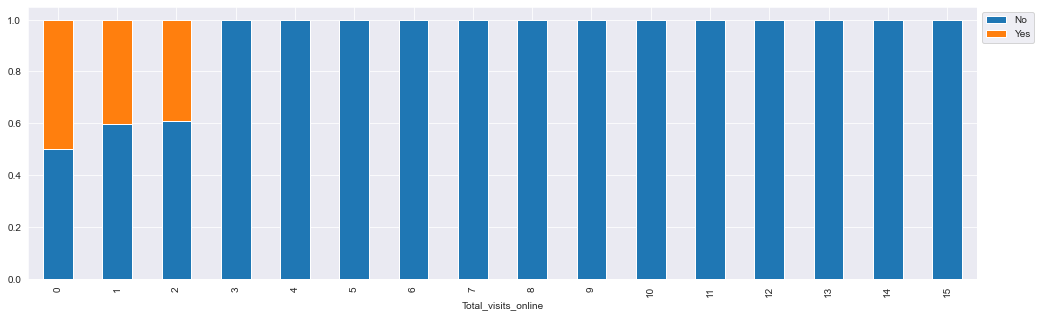

<IPython.core.display.Javascript object>

In [48]:
stacked_barplot(data, "Total_visits_online", "Prefers_Visiting_Bank")

**Observations** 

* Customer with less online visits perfer visting bank personally to get thier questions answered


### Checking Customer does more phone banking prefers to visit bank or not

Prefers_Visiting_Bank   No  Yes  All
Total_calls_made                    
All                    470  190  660
3                       40   43   83
1                       49   41   90
0                       57   40   97
2                       58   33   91
4                       75   33  108
5                       29    0   29
6                       39    0   39
7                       35    0   35
8                       30    0   30
9                       32    0   32
10                      26    0   26
------------------------------------------------------------------------------------------------------------------------


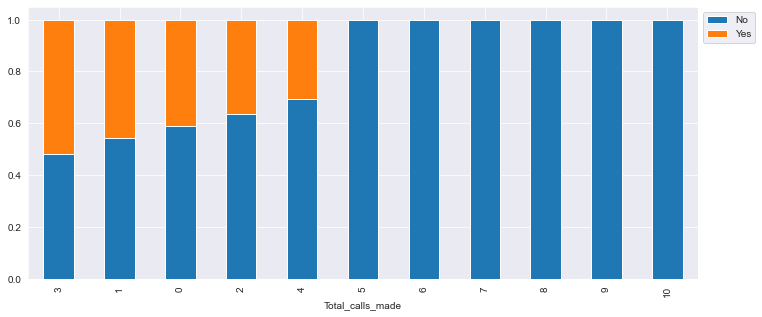

<IPython.core.display.Javascript object>

In [49]:
stacked_barplot(data, "Total_calls_made", "Prefers_Visiting_Bank")

**Observations** 

* Customer with less phone calls made perfer visting bank personally to get thier questions answered



### Check data summary

In [50]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


<IPython.core.display.Javascript object>

In [51]:
data.describe(include="category").T

,count,unique,top,freq
Has_More_Cards,660,2,No,619
Prefers_Online_Banking,660,2,No,617
Prefers_Calling_Bank,660,2,No,498
Prefers_Visiting_Bank,660,2,No,470


<IPython.core.display.Javascript object>

rng

### Loading necessary libraries for Clustering

In [52]:
%%time
# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import (
    KElbowVisualizer,
    SilhouetteVisualizer,
    InterclusterDistance,
)

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to compute distances
from scipy.spatial.distance import pdist

# to perform PCA
from sklearn.decomposition import PCA

CPU times: user 158 ms, sys: 53.2 ms, total: 211 ms
Wall time: 293 ms


<IPython.core.display.Javascript object>

### Scaling the data set



In [53]:
%%time
# Scaling the data set before clustering
scaler = StandardScaler()
subset = data[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

CPU times: user 3.23 ms, sys: 427 µs, total: 3.66 ms
Wall time: 3.46 ms


<IPython.core.display.Javascript object>

### Check summary for scaled data

In [54]:
subset_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,8.195465e-16,1.000758,-0.839808,-0.653623,-0.440840,0.357097,4.399975
Total_Credit_Cards,660.0,-4.006223e-15,1.000758,-1.710864,-0.787585,0.135694,0.597334,2.443892
Total_visits_bank,660.0,1.157323e-16,1.000758,-1.473731,-0.860451,-0.247170,0.979390,1.592670
Total_visits_online,660.0,1.944572e-16,1.000758,-0.888380,-0.547490,-0.206600,0.475180,4.224968
Total_calls_made,660.0,-7.112156e-16,1.000758,-1.251537,-0.902271,-0.203739,0.494794,2.241125


<IPython.core.display.Javascript object>


**Scaled data looks good. Lets proceed with Clustering**

# Clustering Based Unsupervised Learning

Unsupervised machine learning is the machine learning task of inferring a function to describe hidden structure from “unlabeled” data (a classification or categorization is not included in the observations).


## K-means Clustering

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

K-means can be used for vector quantization. This is achieved using the transform method of a trained model of KMeans.

## Elbow Method

**Checking with KElbowVisualizer fits the KMeans model for a range of 𝐾 values from 2 to 9 on the scaled dataset with 8 random clusters of points. When the model is fit with 8 clusters, we can see a line annotating the “elbow” in the graph, which in this case we know to be the optimal number.**

### Elbow Method  - with  metric - "distortion" score
**`distortion`: mean sum of squared distances to centers**

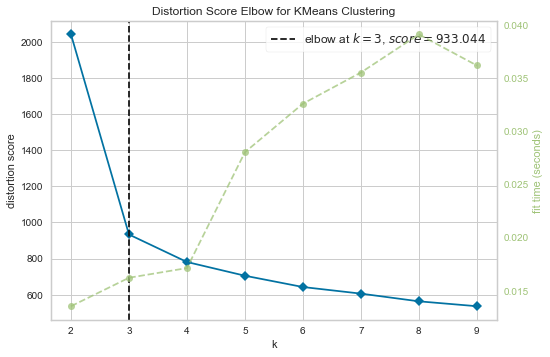

CPU times: user 1.17 s, sys: 399 ms, total: 1.57 s
Wall time: 561 ms


<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<IPython.core.display.Javascript object>

In [55]:
%%time
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(subset_scaled_df)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

**After checking Distortion Score Elbow for KMeans Clustering Appropriate value for k seems to be 3.**

### Elbow Method  - with metric - "silhouette" score
**`silhouette`: mean ratio of intra-cluster and nearest-cluster distance**

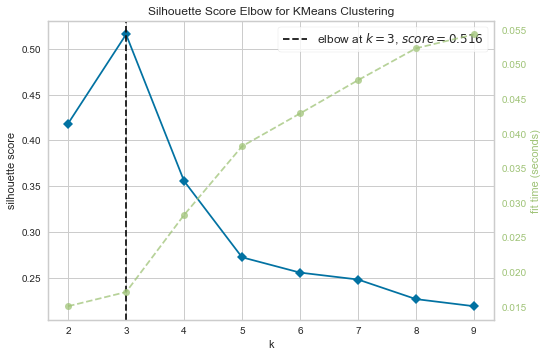

CPU times: user 1.03 s, sys: 920 ms, total: 1.95 s
Wall time: 579 ms


<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

<IPython.core.display.Javascript object>

In [56]:
%%time
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10), metric="silhouette")
visualizer.fit(subset_scaled_df)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

**After checking Silhouette Score Elbow for KMeans Clustering Appropriate value for k seems to be 3.**

### Elbow Method  - with metric - "calinski_harabasz" score
**`calinski_harabasz`: ratio of within to between cluster dispersion**

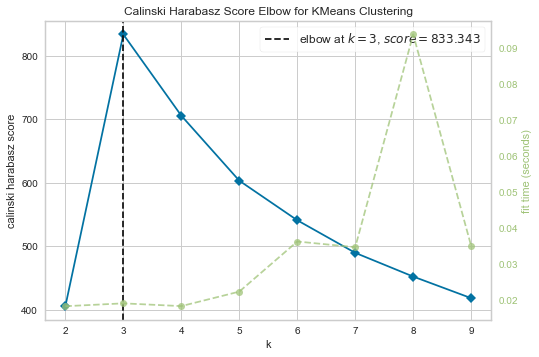

CPU times: user 987 ms, sys: 377 ms, total: 1.36 s
Wall time: 474 ms


<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

<IPython.core.display.Javascript object>

In [57]:
%%time
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10), metric="calinski_harabasz")
visualizer.fit(subset_scaled_df)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

**After checking Calinski Harabasz Score Elbow for KMeans Clustering Appropriate value for k seems to be 3.**


### Observation 

* All 3 elbow method verifiation shows ideal value for K as 3, K=3 would be ideal cluster, Lets proceed with K=3


### Silhouette Visualizer

**The Silhouette Visualizer displays the silhouette coefficient for each sample on a per-cluster basis, visualizing which clusters are dense and which are not. This is particularly useful for determining cluster imbalance, or for selecting a value for 𝐾 by comparing multiple visualizers.**

### Comparing Silhouette Average score using Silhouette Visualizer with different K values. 

#### K=2, K=3 and K=4, To prove K=3 has high silhouette coefficient values


#### Silhouette Visualizer with K=3

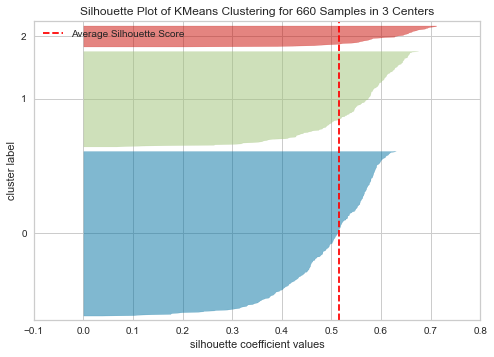

CPU times: user 266 ms, sys: 244 ms, total: 510 ms
Wall time: 140 ms


<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [58]:
%%time
# Instantiate the clustering model and visualizer - with K = 3
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors="yellowbrick")

visualizer.fit(subset_scaled_df)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

**After checking Silhouette Visualizer with K=2 we see Average Silhouette score close of 0.52**

#### Silhouette Visualizer with K=2

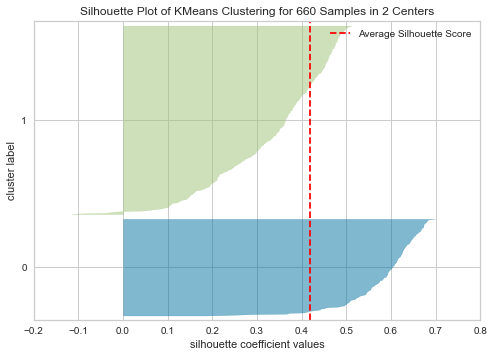

CPU times: user 265 ms, sys: 245 ms, total: 509 ms
Wall time: 138 ms


<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [59]:
%%time
# Instantiate the clustering model and visualizer - with K = 2
model = KMeans(2, random_state=42)
visualizer = SilhouetteVisualizer(model, colors="yellowbrick")

visualizer.fit(subset_scaled_df)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

**After checking Silhouette Visualizer with K=2 we see Average Silhouette score close of 0.42, Less than previous model with K=3**

#### Silhouette Visualizer with K=4

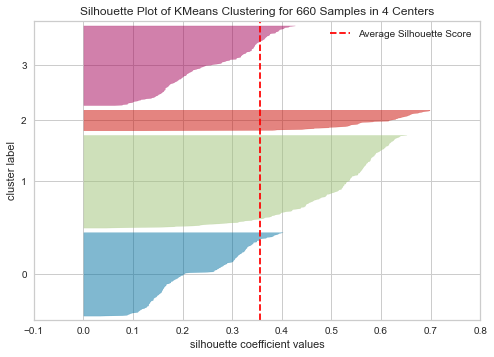

CPU times: user 286 ms, sys: 276 ms, total: 563 ms
Wall time: 152 ms


<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [60]:
%%time
# Instantiate the clustering model and visualizer - with K = 4
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors="yellowbrick")

visualizer.fit(subset_scaled_df)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

**After checking Silhouette Visualizer with K=4 we see Average Silhouette score close of 0.36, Less than previous model with K=3 & K=2**

#### We can clearly see K=3 has high average Silhouette score compared to K=2 or K=4

### Intercluster Distance Maps

#### Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved

#### Comparing Intercluster Distance Maps with K=2, K=3 and K=4 

#### Intercluster Distance with K=3

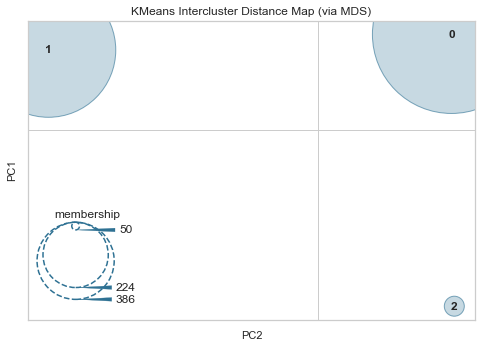

CPU times: user 266 ms, sys: 243 ms, total: 509 ms
Wall time: 144 ms


<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

<IPython.core.display.Javascript object>

In [61]:
%%time
# Instantiate the clustering model and visualizer - with K = 3
model = KMeans(3, random_state=42)
visualizer = InterclusterDistance(model)

visualizer.fit(subset_scaled_df)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

**After checking Intercluster Distance for K=3, We see 3 seperate clusters and no overlapping**

#### Intercluster Distance with K=2

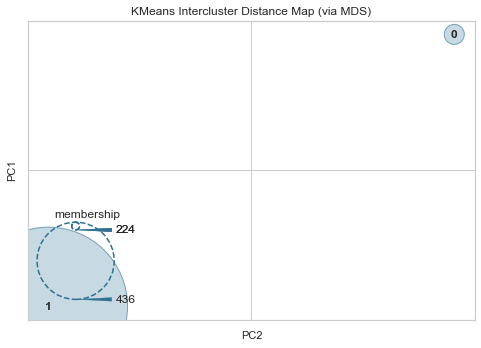

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

<IPython.core.display.Javascript object>

In [62]:
# Instantiate the clustering model and visualizer - with K = 2
model = KMeans(2, random_state=42)
visualizer = InterclusterDistance(model)

visualizer.fit(subset_scaled_df)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

**After checking Intercluster Distance for K=2, We see 2 seperate clusters and no overlapping. But K=3 show 3 sepeate clusters. So K=3 is better**

#### Intercluster Distance with K=4

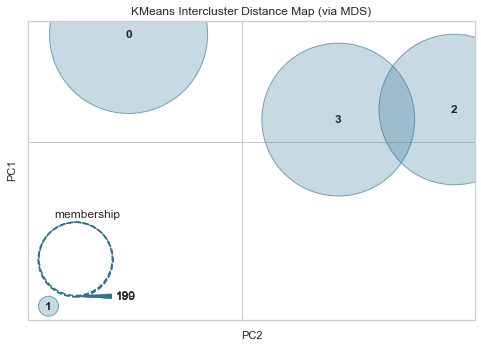

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

<IPython.core.display.Javascript object>

In [63]:
# Instantiate the clustering model and visualizer - with K = 4
model = KMeans(4, random_state=42)
visualizer = InterclusterDistance(model)

visualizer.fit(subset_scaled_df)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

**After checking Intercluster Distance for K=4, We see 4 clusters with overlap eachother.**

#### We can clearly see K=3 has clear cluster segmentaion, with k=2 we can see 2 clusters but with k=3 also we see 3 clusters does not overlap with each other, with k=4 we see 2 cluster overlap with labels 2 and 3. We dont want any clusters overlap each other, So we can pick k=3 and proceed further


### K-means Clustering - Model  K=3, Clustering customers in 3 different segments

In [64]:
%%time
# let's take 3 as number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)
# adding kmeans cluster labels to the original and scaled dataframes
data["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

CPU times: user 34.2 ms, sys: 20.4 ms, total: 54.6 ms
Wall time: 16 ms


<IPython.core.display.Javascript object>

**Added new column K_means_segments which represents customers cluster**

## Cluster Profiling -  K-means Clustering

### Pair Plot analysis with clusters

<Figure size 1800x1440 with 0 Axes>

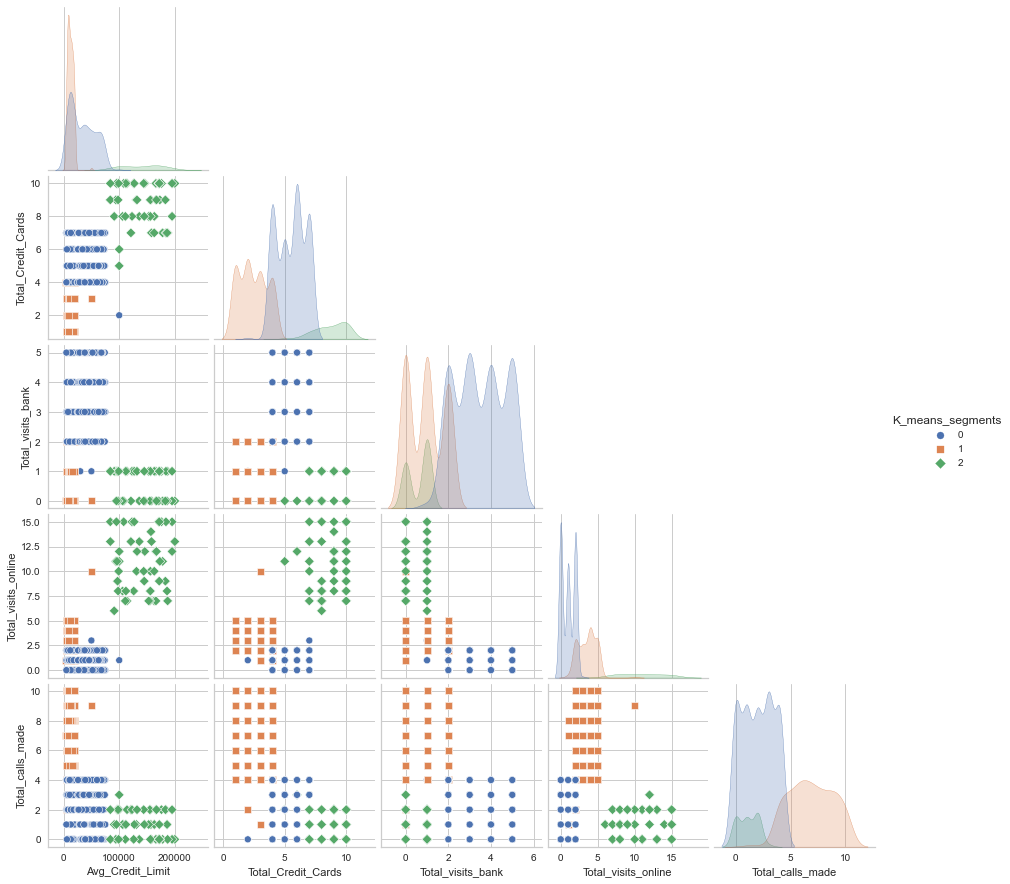

<IPython.core.display.Javascript object>

In [65]:
plt.figure(figsize=(25, 20))
sns.pairplot(
    data, hue="K_means_segments", markers=["o", "s", "D"], corner=True, palette="deep"
)
plt.show()

**we clearly see different data clustering lets check every column and understand how Data grouped** 

### Cluster Summary
**Checking Average and total counts in each segments** 

In [66]:
cluster_profile = data.groupby("K_means_segments").mean()
cluster_profile["count_in_each_segments"] = (
    data.groupby("K_means_segments")["Total_Credit_Cards"].count().values
)
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

### Insights - Cluster Summary
#### Cluster 0

* Total 386 customers
* Customers with avg credit limit approx 34K, Higher than Cluster 1 but lower than Cluster 2
* Customers owns approx 5 to 6 credit cards
* Customers like to visit bank in person 
* Customers does not do much online banking or much phone banking

#### Cluster 1
* Total 224 customers
* Customers with low credit limit
* Customers with less credit cards 1 to 3 cards, that explains low credit limit
* Customers Like to make more calls to bank than online banking or visiting bank in person 

#### Cluster 2
* Total 50 customers
* Customers with high credit limit
* Customers has more credit cards, that explains high credit limit
* Customers like to do online banking 
* Customers does not visit bank in person or call bank

### Checking Data Summary & Range using Box Plot & Swarm plot in 3 different clusters

In [67]:
# Summary for Cluster 0

data[data["K_means_segments"] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,386.0,33782.383420,22169.460696,5000.0,13000.0,31000.0,52000.0,100000.0
Total_Credit_Cards,386.0,5.515544,1.140069,2.0,4.0,6.0,6.0,7.0
Total_visits_bank,386.0,3.489637,1.135563,1.0,3.0,3.0,5.0,5.0
Total_visits_online,386.0,0.981865,0.857167,0.0,0.0,1.0,2.0,3.0
Total_calls_made,386.0,2.000000,1.430648,0.0,1.0,2.0,3.0,4.0
K_means_segments,386.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

In [68]:
# Summary for Cluster 1

data[data["K_means_segments"] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,224.0,12174.107143,5249.048524,3000.0,8000.0,12000.0,16000.0,50000.0
Total_Credit_Cards,224.0,2.410714,1.100783,1.0,1.0,2.0,3.0,4.0
Total_visits_bank,224.0,0.933036,0.803567,0.0,0.0,1.0,2.0,2.0
Total_visits_online,224.0,3.553571,1.218978,1.0,2.0,4.0,4.0,10.0
Total_calls_made,224.0,6.870536,1.990161,1.0,5.0,7.0,9.0,10.0
K_means_segments,224.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

In [69]:
# Summary for Cluster 2

data[data["K_means_segments"] == 2].describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,50.0,141040.00,34457.877272,84000.0,108750.0,145500.0,170000.0,200000.0
Total_Credit_Cards,50.0,8.74,1.274715,5.0,8.0,9.0,10.0,10.0
Total_visits_bank,50.0,0.60,0.494872,0.0,0.0,1.0,1.0,1.0
Total_visits_online,50.0,10.90,2.880264,6.0,8.0,11.0,13.0,15.0
Total_calls_made,50.0,1.08,0.876915,0.0,0.0,1.0,2.0,3.0
K_means_segments,50.0,2.00,0.000000,2.0,2.0,2.0,2.0,2.0


<IPython.core.display.Javascript object>

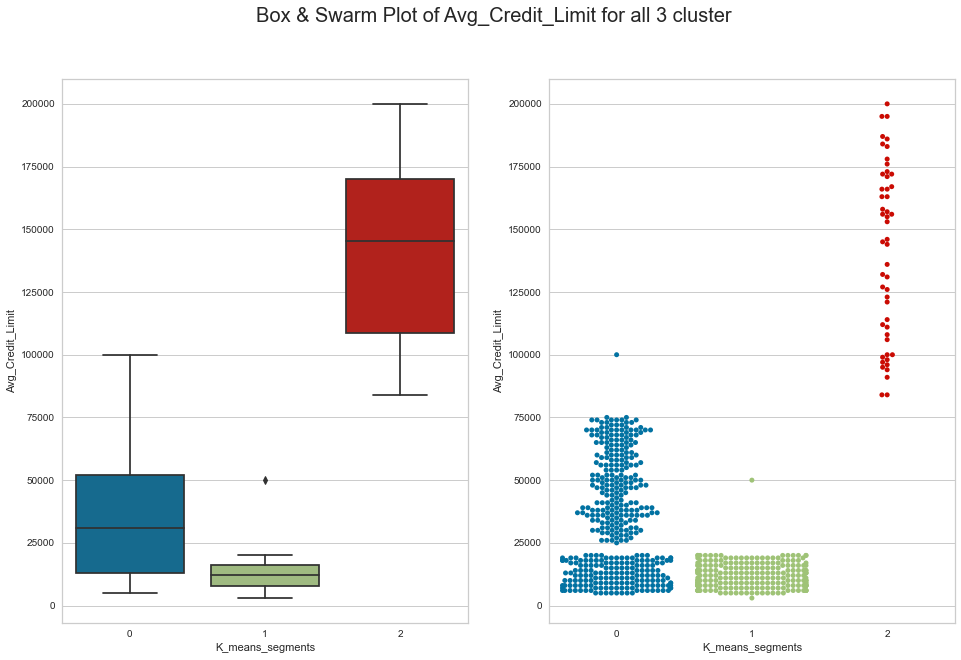

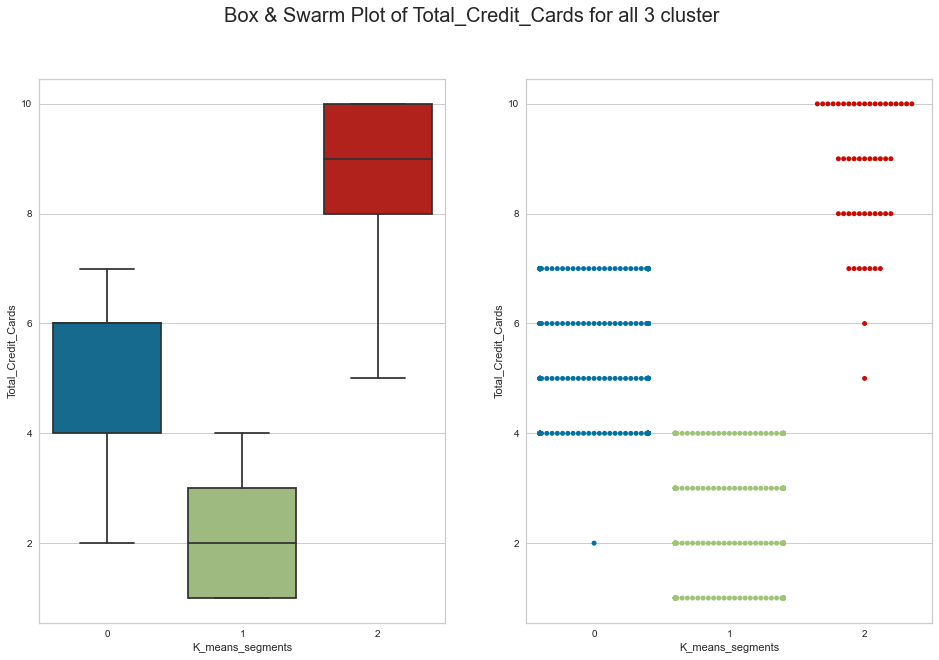

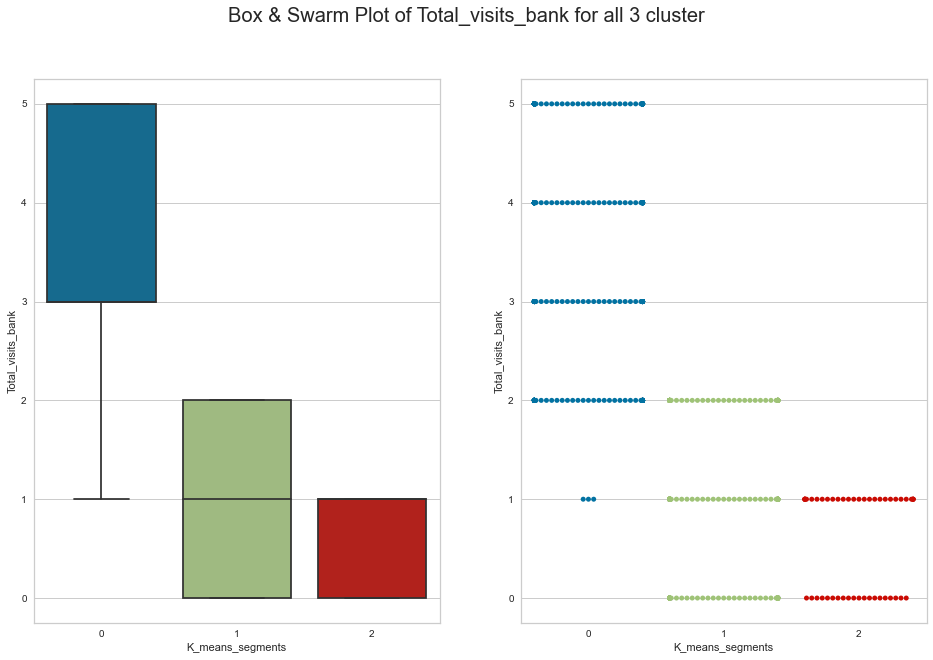

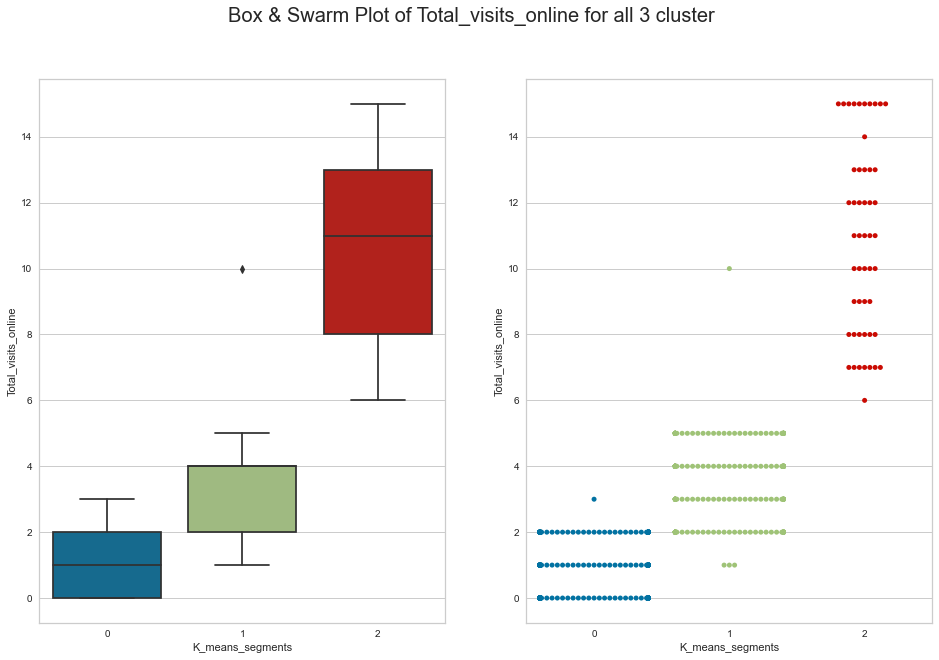

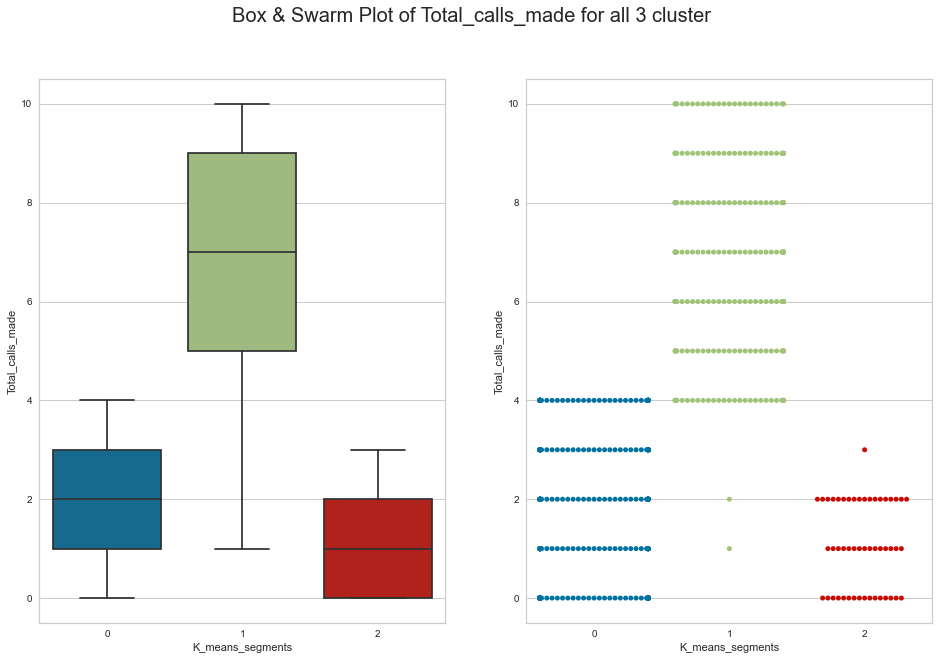

<IPython.core.display.Javascript object>

In [70]:
for item in num_col:
    fig, axes = plt.subplots(1, 2, figsize=(16, 10))
    fig.suptitle(f"Box & Swarm Plot of {item} for all 3 cluster", fontsize=20)
    sns.boxplot(ax=axes[0], x=data["K_means_segments"], y=data[item])
    sns.swarmplot(ax=axes[1], x=data["K_means_segments"], y=data[item])
    plt.show()

### Insights - Data Summary, Box Plot & Swarm plot

**We can clean customers clusters seperately for all features** 

#### Cluster 0

* Average Credit Limit - Customer Credit limit range from 5K to 100K, and IQR Falls within 13K to 52K - Mid Credit range
* Total Credit Cards - Customers holds 4 to 6 Credit cards, That answers why thier credit limit are in mid range. 
* Total Bank Visits - Customers vists banks 1 or 2 times, Custer 1 Customers does not like to visit bank. 
* Total Online Visit - Customer does 1 or 2 times online banking account visits.  Custer 0 Customers does not like online banking.
* Total Calls Made - - Customer does 1 or 2 times phone/call banking.  Custer 0 Customers does not like phone banking.


#### Cluster 1

* Average Credit Limit - Customer Credit limit range from 3K to 50K, and IQR Falls within 8K to 16K - Low Credit range
* Total Credit Cards - Customers holds 2 to 3 Credit cards, That answers why thier credit limit are in low range. 
* Total Bank Visits - Customers vists banks 3 to 5 times, Custer 1 Customers does not like to visit bank a lot. 
* Total Online Visit - Customer does 2 or 4 times online banking account visits.  Custer 1 Customers does not like online banking.
* Total Calls Made - - Customer does 5 or 9 times phone/call banking.  Custer 1 Customers like phone banking.


#### Cluster 2


* Average Credit Limit - Customer Credit limit range from 84K to 200K, and IQR Falls within 108K to 170K - Very high Credit range
* Total Credit Cards - Customers holds 8 to 10 Credit cards, That answers why thier credit limit are in high range. 
* Total Bank Visits -  Custer 2 Customers does not like to visit bank.
* Total Online Visit - Customer does 8 or 15 times online banking account visits.  Custer 2 Customers like online banking.
* Total Calls Made - - Customer does 1 or 2 times phone/call banking.  Custer 2 Customers does not like phone banking.





### Checking New features added in 3 different clusters
**lets check new boolean features data for 3 different clusters** 

#### Customers Has more credit cards in 3 different clusters

In [71]:
pd.crosstab(data["K_means_segments"], data["Has_More_Cards"]).style.highlight_max(
    color="lightgreen", axis=0
)



Has_More_Cards,No,Yes
K_means_segments,,
0,386,0
1,224,0
2,9,41


<IPython.core.display.Javascript object>

#### Customers prefers online banking in 3 different clusters

In [72]:


pd.crosstab(
    data["K_means_segments"], data["Prefers_Online_Banking"]
).style.highlight_max(color="lightgreen", axis=0)






Prefers_Online_Banking,No,Yes
K_means_segments,,
0,386,0
1,223,1
2,8,42


<IPython.core.display.Javascript object>

#### Customers prefers phone banking in 3 different clusters

In [73]:

pd.crosstab(
    data["K_means_segments"], data["Prefers_Calling_Bank"]
).style.highlight_max(color="lightgreen", axis=0)



Prefers_Calling_Bank,No,Yes
K_means_segments,,
0,386,0
1,62,162
2,50,0


<IPython.core.display.Javascript object>

#### Customers prefers visiting bank in 3 different clusters

In [74]:
pd.crosstab(
    data["K_means_segments"], data["Prefers_Visiting_Bank"]
).style.highlight_max(color="lightgreen", axis=0)

Prefers_Visiting_Bank,No,Yes
K_means_segments,,
0,196,190
1,224,0
2,50,0


<IPython.core.display.Javascript object>

### Insights - From New Features 

#### Cluster 0

* Has More Cards - All 386 customer has 7 or less credit cards.
* Prefers Online Banking - Customers does not like online banking
* Prefers Calling Bank -  Customers does not like phone banking
* Prefers Visiting Bank - They like to visit bank to clarify questions or resolve issues 

#### Cluster 1

* Has More Cards - All 224 customer has 3 or less credit cards.
* Prefers Online Banking - Customers does not like online banking
* Prefers Calling Bank -  Most Customers like phone banking, Some customer does less phone banking
* Prefers Visiting Bank - They dont like visiting bank

#### Cluster 2


* Has More Cards - Cluster 2 customers has high number of credit cards, We can see 42 customer out of 50 has 8 or more cards, Other 8 customers in the cluster 2 has 5 to 7 credit cards 
* Prefers Online Banking - Customers like online banking 
* Prefers Calling Bank -  Customers does not like phone banking
* Prefers Visiting Bank - They dont like visiting bank



## Summary Insights - K-means Clustering 

**we are able to put customers in 3 different segment buckets** 


- **Cluster 0**:
    - Total 386 customers
    - Customers with mid range credit limit and owns 5 to 6 credit cards 
    - Customers like to visit bank in person, Customers does not do much online banking or much phone banking
    - Prefers Visiting Bank - They like to visit bank to clarify questions or resolve issues 
    - No Phone banking or Online banking, Like to visit bank
    
    
    
- **Cluster 1**:
    - Total 224 customers
    - Customers with low credit limit and owns 1 to 3 credit cards 
    - Customers Like to make more calls to bank, Phone banking than online banking or visiting bank in person 
    - No Online banking or Visiting Bank in person, Like Phone banking
    
    
    
- **Cluster 2**:
    - Total 50 customers
    - Customers with very high credit limit and owns 8 to 10 credit cards 
    - Customers like to do online banking - lot of online activities
    - Customers does not visit bank in person or call bank
    - No Phone banking or Visiting Bank in person, Like Online banking



## Hierarchical Clustering

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. 


### Scaling the data set

In [75]:
# DROP Kmeans segment lables from data for now
data.drop("K_means_segments", axis=1, inplace=True)

# Scaling the data set before clustering
scaler = StandardScaler()
subset = data[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>


## Linkage methods
**Ward** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

**Maximum or complete** linkage minimizes the maximum distance between observations of pairs of clusters.

**Average** linkage minimizes the average of the distances between all observations of pairs of clusters.

**Single** linkage minimizes the distance between the closest observations of pairs of clusters.

## Distance Metric

The method you use to calculate the distance between data points will affect the end result.

**Euclidean Distance** The shortest distance between two points.

**Manhattan Distance or City Block Distance** Imagine you were in the downtown center of a big city and you wanted to get from point A to point B. You wouldn’t be able to cut across buildings, rather you’d have to make your way by walking along the various streets.

**Mahalanobis distance** is an effective multivariate distance metric that measures the distance between a point and a distribution.

**Chebyshev distance** is a distance metric which is the maximum absolute distance in one dimension of two N dimensional points.

In [76]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]


distance_values = []
distance_metrics_values = []
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))

        distance_values.append(c)
        distance_metrics_values.append((dm + " " + lm).capitalize())


<IPython.core.display.Javascript object>

In [77]:
# Create Data from data collected and sort data to find best distance type
distance_values_df = pd.DataFrame(distance_metrics_values, columns=["Linkage_Type"])
distance_values_df["Cophenetic_Correlation"] = distance_values
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
distance_values_df.sort_values(by="Cophenetic_Correlation", ascending=False)

,Linkage_Type,Cophenetic_Correlation
2,Euclidean average,0.897708
6,Chebyshev average,0.897416
14,Cityblock average,0.896329
7,Chebyshev weighted,0.891362
3,Euclidean weighted,0.886175
15,Cityblock weighted,0.882552
13,Cityblock complete,0.873148
1,Euclidean complete,0.859973
5,Chebyshev complete,0.853347
10,Mahalanobis average,0.832699


<IPython.core.display.Javascript object>

**Euclidean average has distance values 0.916 which is better than all other combination. Euclidean average, Chebyshev average and Cityblock average values are almoost close but Euclidean average ranks first and better**


### Euclidean Distance

The method you use to calculate the distance between data points will affect the end result.

**Euclidean Distance** The shortest distance between two points.

**Let's explore different linkage methods with Euclidean distance only.**

In [78]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

distance_values = []
distance_metrics_values = []

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    distance_values.append(c)
    distance_metrics_values.append(("Euclidean " + lm).capitalize())

<IPython.core.display.Javascript object>

In [79]:
# Create Data from data collected and sort data to find best distance type
distance_values_df = pd.DataFrame(distance_metrics_values, columns=["Linkage_Type"])
distance_values_df["Cophenetic_Correlation"] = distance_values
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
distance_values_df.sort_values(by="Cophenetic_Correlation", ascending=False)

,Linkage_Type,Cophenetic_Correlation
2,Euclidean average,0.897708
3,Euclidean centroid,0.893939
5,Euclidean weighted,0.886175
1,Euclidean complete,0.859973
4,Euclidean ward,0.741516
0,Euclidean single,0.739122


<IPython.core.display.Javascript object>

**Euclidean Distance Observations**

- We see that the cophenetic correlation is maximum with Euclidean average linkage.
- The cophenetic correlation with Euclidean distance and centroid and weighted linkage is slightly less than the combination with maximum cophenetic correlation. 
- Euclidean ward linkage has very low cophenetic correlation. 


**Let's see the dendrograms for the different linkage methods.**


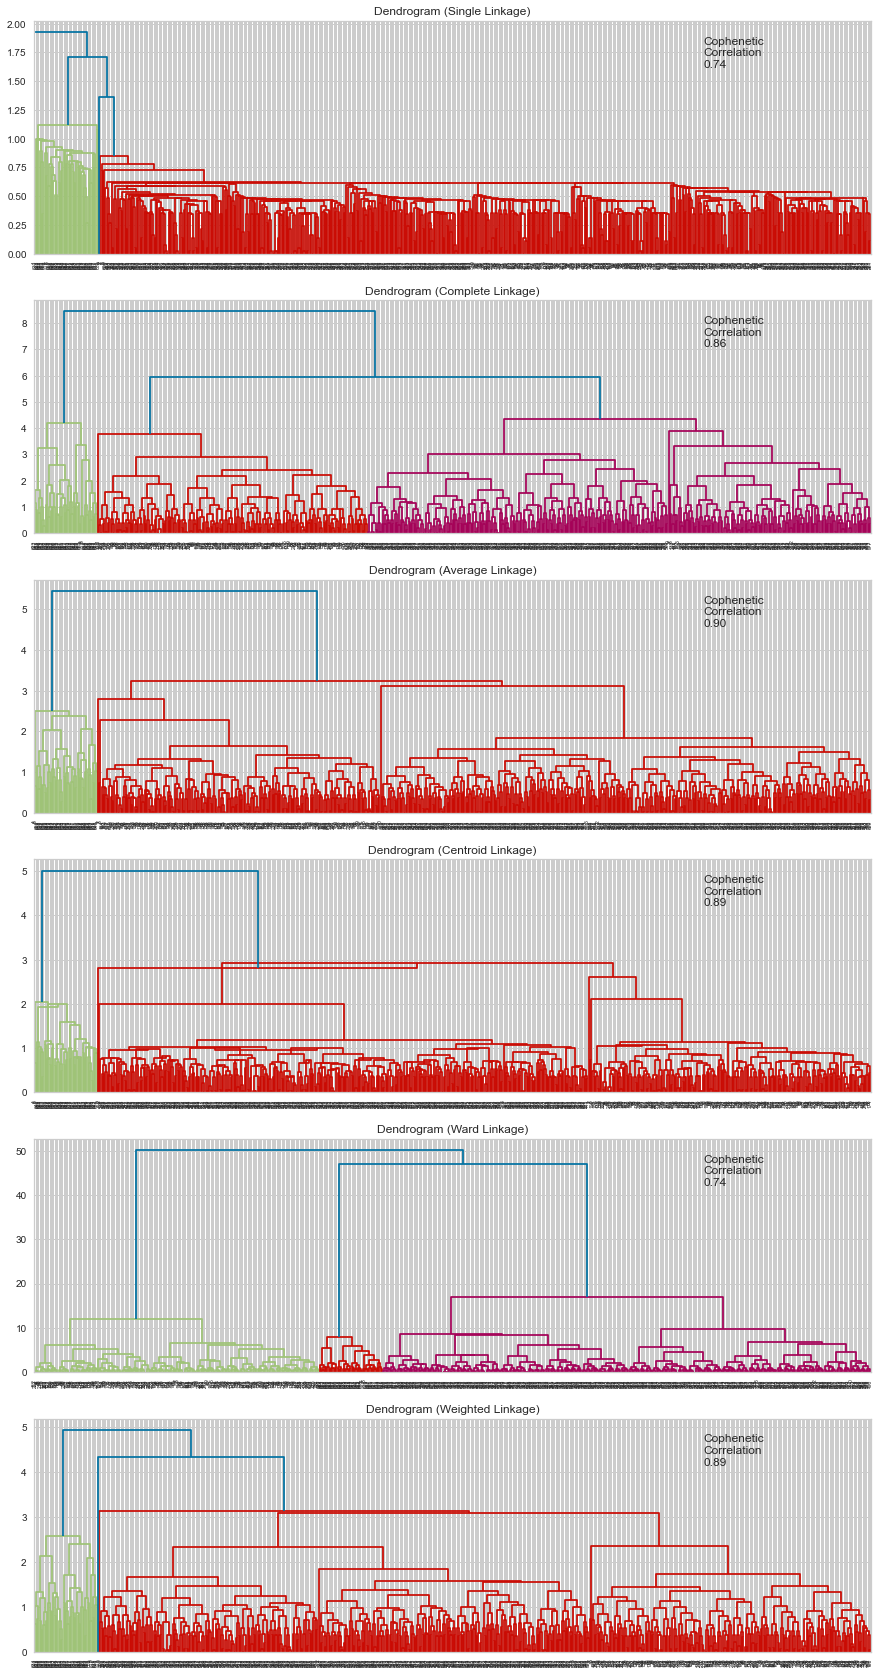

<IPython.core.display.Javascript object>

In [80]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations**

- Dendrogram for Average & Centroid linkage shows high Cophenetic Coefficient values.
- Dendrogram for Complete & Ward linkage shows distinct and 3 separate clusters. And Complete linkage shows high Cophenetic Coefficient values compared to Ward

In [81]:
# let's create a dataframe to compare cophenetic correlations for each linkage method

distance_values_df = pd.DataFrame(compare, columns=compare_cols)

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
distance_values_df.sort_values(by="Cophenetic Coefficient", ascending=False)

,Linkage,Cophenetic Coefficient
2,average,0.897708
3,centroid,0.893939
5,weighted,0.886175
1,complete,0.859973
4,ward,0.741516
0,single,0.739122


<IPython.core.display.Javascript object>

**Let's see the dendrogram for Mahalanobis and Manhattan distances with average and weighted linkage methods (as they gave high cophenetic correlation values).**

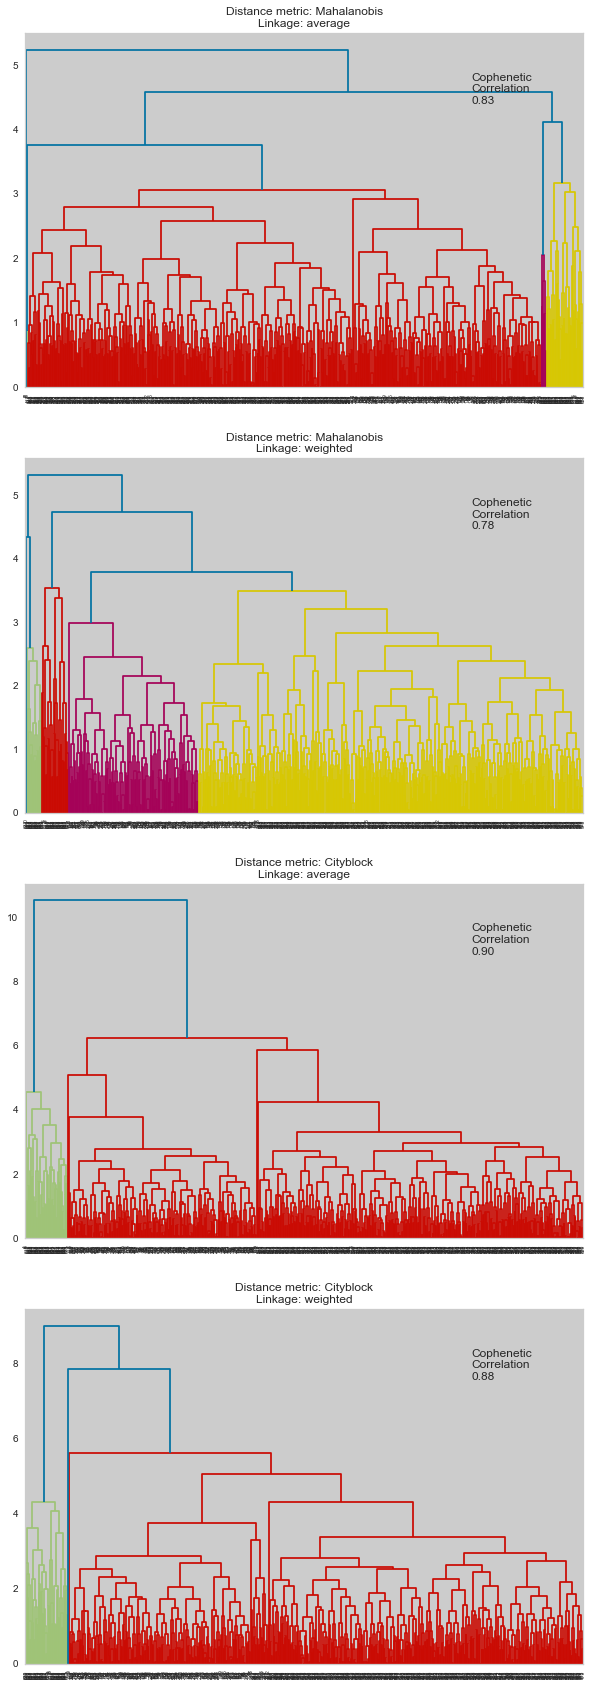

<IPython.core.display.Javascript object>

In [82]:
# list of distance metrics
distance_metrics = ["mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "weighted"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

**Observations**

- Out of all the dendrograms we saw, it is clear that the dendrogram with Complete & Ward linkage gave us separate and distinct clusters. And Complete linkage shows high Cophenetic Coefficient values compared to Ward
- 3 would be the appropriate number of the clusters from the dendrogram with Complete linkage method. 

### Agglomerative Clustering Models 

The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. 

Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters.

### clustering model and visualizer to find ideal cluster value

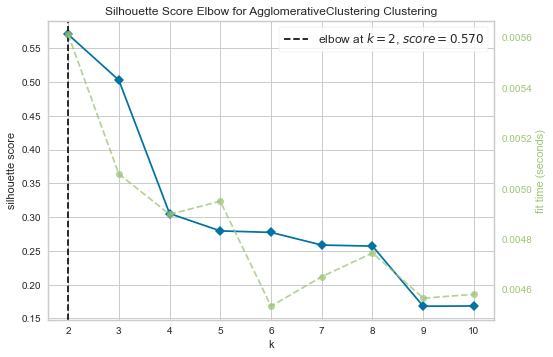

CPU times: user 509 ms, sys: 633 ms, total: 1.14 s
Wall time: 367 ms


<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

<IPython.core.display.Javascript object>

In [83]:
%%time
# Instantiate the clustering model and visualizer
model = AgglomerativeClustering(affinity="euclidean", linkage="complete")
visualizer = KElbowVisualizer(model, n_clusters=(2, 10), metric="silhouette")
visualizer.fit(subset_scaled_df)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

**From dendrograms & Silhouette Score Elbow we see 3 would be ideal cluster value**  

**Let's create 3 clusters.**

In [84]:
%%time
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="complete")
HCmodel.fit(subset_scaled_df)

CPU times: user 10.3 ms, sys: 4.58 ms, total: 14.9 ms
Wall time: 5.28 ms


AgglomerativeClustering(linkage='complete', n_clusters=3)

<IPython.core.display.Javascript object>

**Adding cluster table to existing data.**

In [85]:
%%time
# adding hierarchical cluster labels to the original and scaled dataframes
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

CPU times: user 748 µs, sys: 150 µs, total: 898 µs
Wall time: 760 µs


<IPython.core.display.Javascript object>

## Cluster Profiling -  Hierarchical Clustering

### Pair Plot analysis

<Figure size 1800x1440 with 0 Axes>

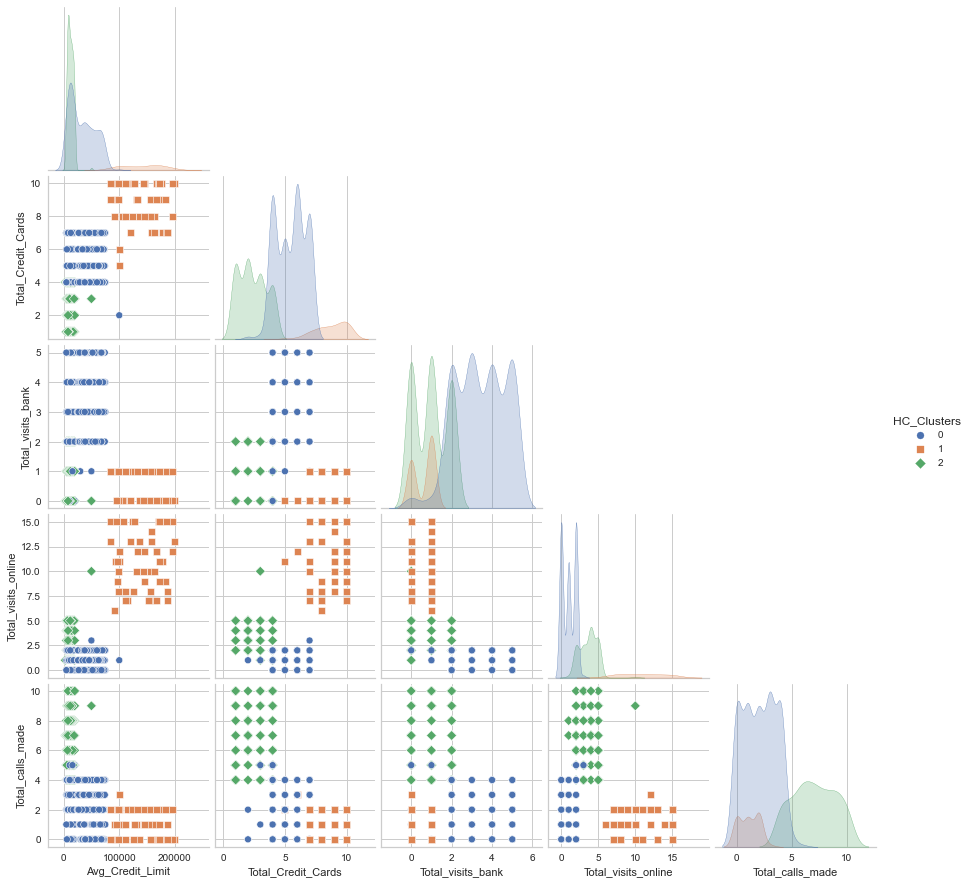

<IPython.core.display.Javascript object>

In [86]:
plt.figure(figsize=(25, 20))
sns.pairplot(
    data, hue="HC_Clusters", markers=["o", "s", "D"], corner=True, palette="deep",
)
plt.show()

**We clearly see different data clustering lets check every column and understand how Data grouped. This is very simialr to KMeans clustering** 

### Cluster Summary
**Checking Average and total counts in each segments** 



In [87]:
cluster_profile = data.groupby("HC_Clusters").mean()
cluster_profile["count_in_each_segments"] = (
    data.groupby("HC_Clusters")["Total_Credit_Cards"].count().values
)
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,33151.133501,5.460957,3.405542,1.010076,2.060453,397
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12234.741784,2.352113,0.957746,3.633803,7.009390,213


<IPython.core.display.Javascript object>

### Insights - Hierarchical Clustering  Summary
#### Cluster 0

* Total 397 customer 
* Customers with avg credit limit approx 33K, Higher than Cluster 2 but lower than Cluster 1
* Customers owns approx 5 to 6 credit cards
* Customers like to visit bank in person 
* Customers does not do much online banking or much phone banking 

#### Cluster 1
* Total 50 customers
* Customers with high credit limit
* Customers has more credit cards, that explains high credit limit
* Customers like to do online banking 
* Customers does not visit bank in person or call bank

#### Cluster 2
* Total 213 customers
* Customers with low credit limit
* Customers with less credit cards 1 to 3 cards, that explains low credit limit
* Customers Like to make more calls to bank than online banking or visiting bank in person 



### Checking Data Summary & Range using Box Plot & Swarm plot in 3 different clusters

In [88]:
# Summary for Cluster 0

data[data["HC_Clusters"] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,397.0,33151.133501,22191.369921,5000.0,13000.0,30000.0,51000.0,100000.0
Total_Credit_Cards,397.0,5.460957,1.174911,2.0,4.0,6.0,6.0,7.0
Total_visits_bank,397.0,3.405542,1.230615,0.0,2.0,3.0,4.0,5.0
Total_visits_online,397.0,1.010076,0.864507,0.0,0.0,1.0,2.0,3.0
Total_calls_made,397.0,2.060453,1.474145,0.0,1.0,2.0,3.0,6.0
HC_Clusters,397.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

In [89]:
# Summary for Cluster 1

data[data["HC_Clusters"] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,50.0,141040.00,34457.877272,84000.0,108750.0,145500.0,170000.0,200000.0
Total_Credit_Cards,50.0,8.74,1.274715,5.0,8.0,9.0,10.0,10.0
Total_visits_bank,50.0,0.60,0.494872,0.0,0.0,1.0,1.0,1.0
Total_visits_online,50.0,10.90,2.880264,6.0,8.0,11.0,13.0,15.0
Total_calls_made,50.0,1.08,0.876915,0.0,0.0,1.0,2.0,3.0
HC_Clusters,50.0,1.00,0.000000,1.0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

In [90]:
# Summary for Cluster 2

data[data["HC_Clusters"] == 2].describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,213.0,12234.741784,5270.182639,3000.0,8000.0,12000.0,16000.0,50000.0
Total_Credit_Cards,213.0,2.352113,1.087215,1.0,1.0,2.0,3.0,4.0
Total_visits_bank,213.0,0.957746,0.802766,0.0,0.0,1.0,2.0,2.0
Total_visits_online,213.0,3.633803,1.192422,1.0,3.0,4.0,5.0,10.0
Total_calls_made,213.0,7.009390,1.915652,4.0,6.0,7.0,9.0,10.0
HC_Clusters,213.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


<IPython.core.display.Javascript object>

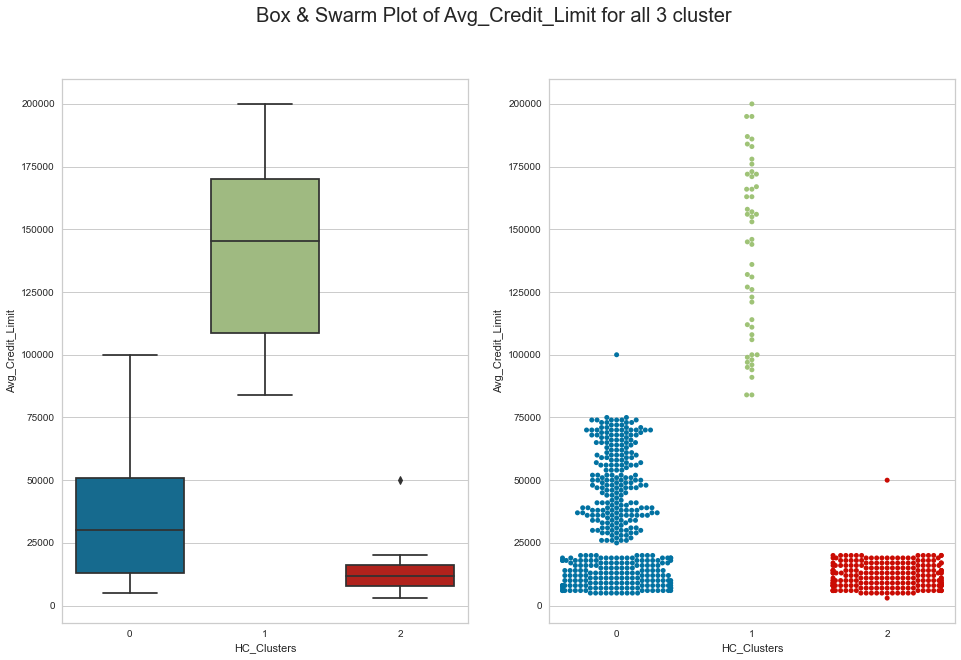

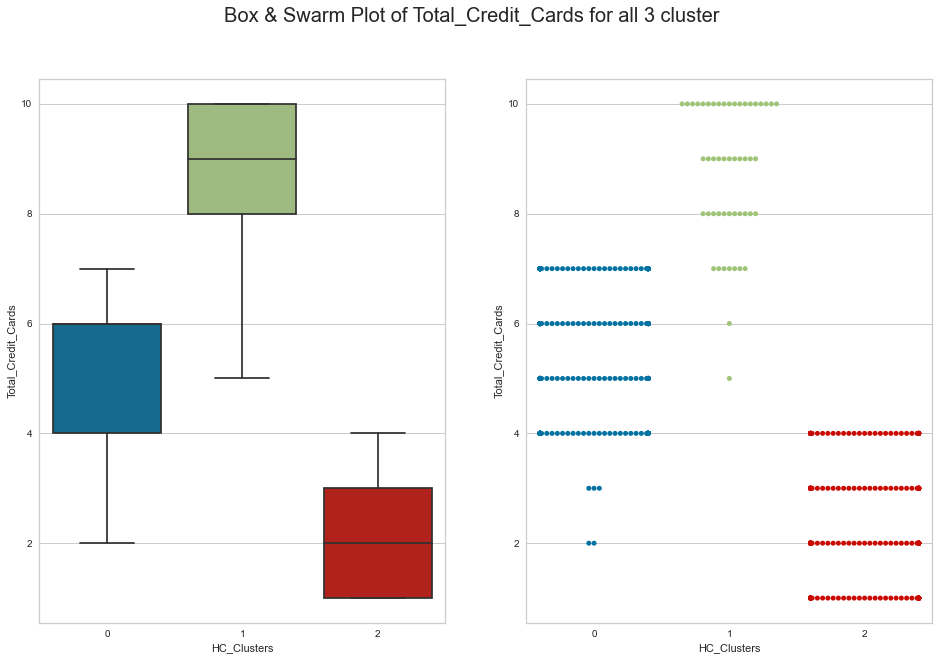

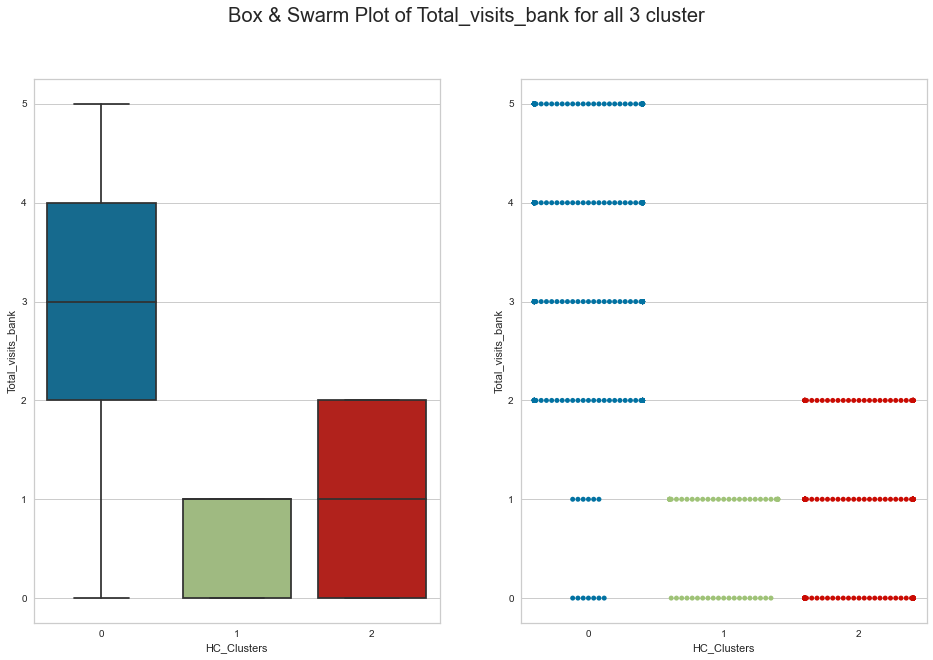

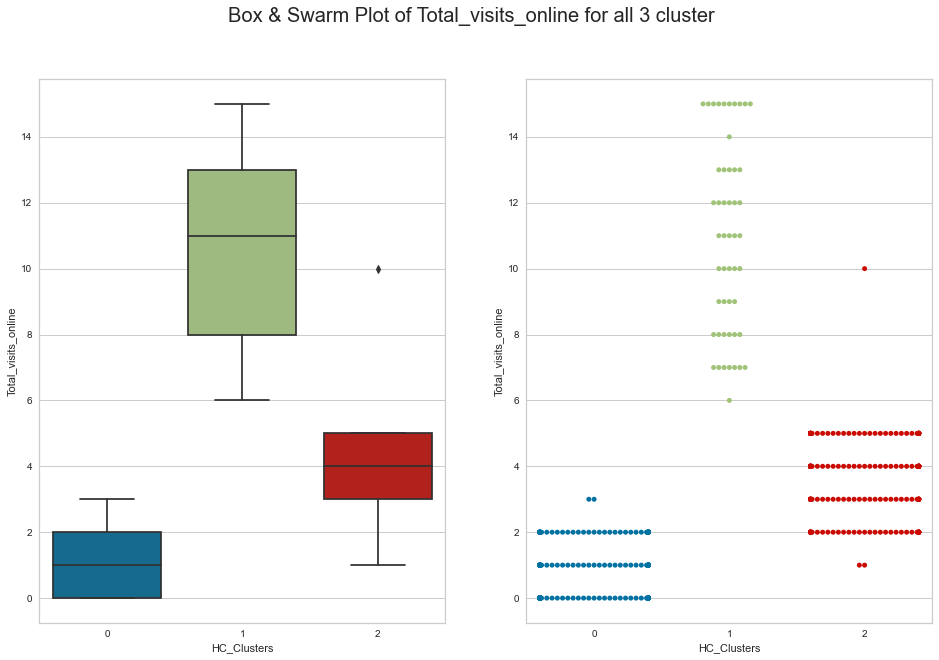

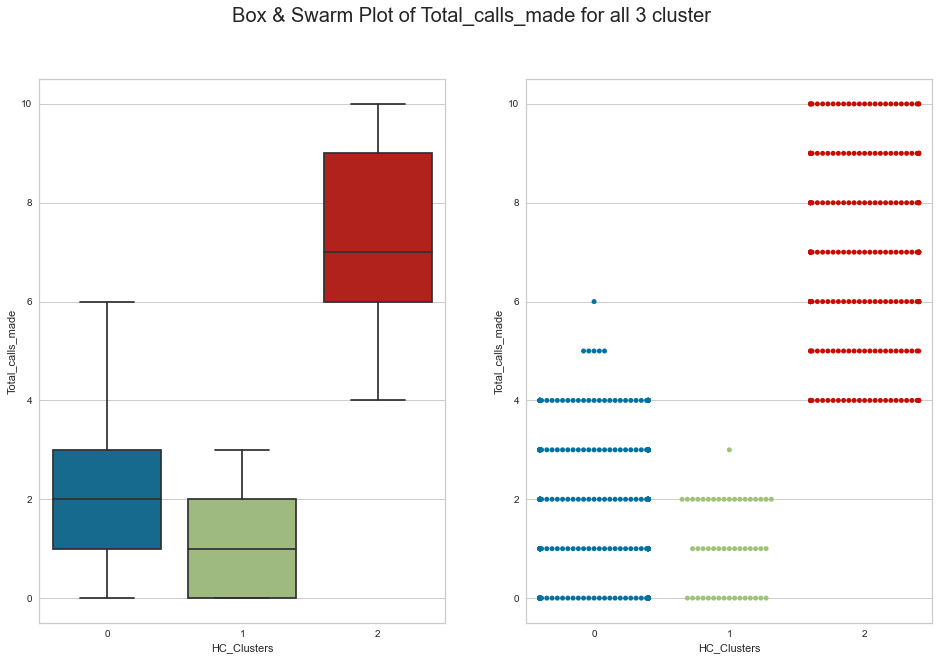

<IPython.core.display.Javascript object>

In [91]:
for item in num_col:
    fig, axes = plt.subplots(1, 2, figsize=(16, 10))
    fig.suptitle(f"Box & Swarm Plot of {item} for all 3 cluster", fontsize=20)
    sns.boxplot(ax=axes[0], x=data["HC_Clusters"], y=data[item])
    sns.swarmplot(ax=axes[1], x=data["HC_Clusters"], y=data[item])
    plt.show()

### Insights - Data Summary, Box Plot & Swarm plot

**We can clean customers clusters seperately for all features** 

#### Cluster 0

* Average Credit Limit - Customer Credit limit range from 5K to 100K, and IQR Falls within 13K to 52K - Mid Credit range
* Total Credit Cards - Customers holds 4 to 6 Credit cards, That answers why thier credit limit are in mid range. 
* Total Bank Visits - Customers vists banks 1 or 2 times, Custer 1 Customers does not like to visit bank. 
* Total Online Visit - Customer does 1 or 2 times online banking account visits.  Custer 0 Customers does not like online banking.
* Total Calls Made - - Customer does 1 or 2 times phone/call banking.  Custer 0 Customers does not like phone banking.


#### Cluster 1


* Average Credit Limit - Customer Credit limit range from 84K to 200K, and IQR Falls within 108K to 170K - Very high Credit range
* Total Credit Cards - Customers holds 8 to 10 Credit cards, That answers why thier credit limit are in high range. 
* Total Bank Visits -  Custer 2 Customers does not like to visit bank.
* Total Online Visit - Customer does 8 or 15 times online banking account visits.  Custer 2 Customers like online banking.
* Total Calls Made - - Customer does 1 or 2 times phone/call banking.  Custer 2 Customers does not like phone banking.


#### Cluster 2

* Average Credit Limit - Customer Credit limit range from 3K to 50K, and IQR Falls within 8K to 16K - Low Credit range
* Total Credit Cards - Customers holds 2 to 3 Credit cards, That answers why thier credit limit are in low range. 
* Total Bank Visits - Customers vists banks 3 to 5 times, Custer 1 Customers does not like to visit bank a lot. 
* Total Online Visit - Customer does 2 or 4 times online banking account visits.  Custer 1 Customers does not like online banking.
* Total Calls Made - - Customer does 5 or 9 times phone/call banking.  Custer 1 Customers like phone banking.






### Checking New features added in 3 different clusters
**lets check new boolean features data for 3 different clusters** 

#### Customers Has more credit cards in 3 different clusters

In [92]:
pd.crosstab(data["HC_Clusters"], data["Has_More_Cards"]).style.highlight_max(
    color="lightgreen", axis=0
)



Has_More_Cards,No,Yes
HC_Clusters,,
0,397,0
1,9,41
2,213,0


<IPython.core.display.Javascript object>

#### Customers prefers online banking in 3 different clusters

In [93]:


pd.crosstab(
    data["HC_Clusters"], data["Prefers_Online_Banking"]
).style.highlight_max(color="lightgreen", axis=0)






Prefers_Online_Banking,No,Yes
HC_Clusters,,
0,397,0
1,8,42
2,212,1


<IPython.core.display.Javascript object>

#### Customers prefers phone banking in 3 different clusters

In [94]:

pd.crosstab(
    data["HC_Clusters"], data["Prefers_Calling_Bank"]
).style.highlight_max(color="lightgreen", axis=0)



Prefers_Calling_Bank,No,Yes
HC_Clusters,,
0,396,1
1,50,0
2,52,161


<IPython.core.display.Javascript object>

#### Customers prefers visiting bank in 3 different clusters

In [95]:
pd.crosstab(data["HC_Clusters"], data["Prefers_Visiting_Bank"]).style.highlight_max(
    color="lightgreen", axis=0
)

Prefers_Visiting_Bank,No,Yes
HC_Clusters,,
0,207,190
1,50,0
2,213,0


<IPython.core.display.Javascript object>

### Insights - From New Features 

#### Cluster 0

* Has More Cards - All 397 customer has 7 or less credit cards.
* Prefers Online Banking - Customers does not like online banking
* Prefers Calling Bank -  Customers does not like phone banking
* Prefers Visiting Bank - They like to visit bank to clarify questions or resolve issues 

#### Cluster 1


* Has More Cards - Cluster 2 customers has high number of credit cards, We can see 42 customer out of 50 has 8 or more cards, Other 8 customers in the cluster 2 has 5 to 7 credit cards 
* Prefers Online Banking - Customers like online banking 
* Prefers Calling Bank -  Customers does not like phone banking
* Prefers Visiting Bank - They dont like visiting bank


#### Cluster 2

* Has More Cards - All 213 customer has 3 or less credit cards.
* Prefers Online Banking - Customers does not like online banking
* Prefers Calling Bank -  Most Customers like phone banking, Some customer does less phone banking
* Prefers Visiting Bank - They dont like visiting bank




## Summary Insights - Hierarchical Clustering 

**we are able to put customers in 3 different segment buckets** 


- **Cluster 0**:
    - Total 386 customers
    - Customers with mid range credit limit and owns 5 to 6 credit cards 
    - Customers like to visit bank in person, Customers does not do much online banking or much phone banking
    - Prefers Visiting Bank - They like to visit bank to clarify questions or resolve issues 
    - No Phone banking or Online banking, Like to visit bank
    
        
- **Cluster 1**:
    - Total 50 customers
    - Customers with very high credit limit and owns 8 to 10 credit cards 
    - Customers like to do online banking - lot of online activities
    - Customers does not visit bank in person or call bank
    - No Phone banking or Visiting Bank in person, Like Online banking
    
- **Cluster 2**:
    - Total 224 customers
    - Customers with low credit limit and owns 1 to 3 credit cards 
    - Customers Like to make more calls to bank, Phone banking than online banking or visiting bank in person 
    - No Online banking or Visiting Bank in person, Like Phone banking
    
    




In [96]:
# adding back kmeans cluster labels

# adding kmeans cluster labels to the original and scaled dataframes
data["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

# K-Means vs Hierarchical Clustering  

- Kmeans group 0 and Hierarchical group 0 are same type of customers segments
- Kmeans group 2 is Hierarchical group 1, Kmeans group 1 is Hierarchical group 2

**lets create a matched column comparing these values** 

In [97]:
# Comparing KMeans & Hierarchical Label and creating new column matched
# Function to add
def compare_values(kmeans_val, hier_val):
    if kmeans_val == 0 and hier_val == 0:
        return 1
    elif kmeans_val == 1 and hier_val == 2:
        return 1
    elif kmeans_val == 2 and hier_val == 1:
        return 1
    else:
        return 0


data["matched"] = data.apply(
    lambda row: compare_values(row["K_means_segments"], row["HC_Clusters"]), axis=1
)
print("% customers segments matched between Kmeans & Hierarchical")
data["matched"].value_counts(normalize=True).mul(100).round(1).astype(str) + "%"



% customers segments matched between Kmeans & Hierarchical


1    98.3%
0     1.7%
Name: matched, dtype: object

<IPython.core.display.Javascript object>

In [98]:
print("customers segments matched between Kmeans & Hierarchical")
data["matched"].value_counts()

customers segments matched between Kmeans & Hierarchical


1    649
0     11
Name: matched, dtype: int64

<IPython.core.display.Javascript object>

### Observation on clusters

**98.3% csutomers(649) segments matching between K-Means vs Hierarchical Clustering. Only 1.7%(11 customers) cluster into different buckets**

# Comparing K-Means vs Hierarchical Clustering  

#### Customers clusters did not match

In [99]:
# Clusters did not match
data[data["matched"] == 0]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Has_More_Cards,Prefers_Online_Banking,Prefers_Calling_Bank,Prefers_Visiting_Bank,HC_Clusters,K_means_segments,matched
7,15000,3,0,1,1,No,No,No,No,0,1,0
8,5000,2,0,2,2,No,No,No,No,0,1,0
87,5000,4,1,2,5,No,No,No,No,0,1,0
113,7000,4,1,2,4,No,No,No,No,0,1,0
131,9000,3,0,2,5,No,No,No,No,0,1,0
132,12000,4,0,2,6,No,No,Yes,No,0,1,0
184,14000,4,0,2,4,No,No,No,No,0,1,0
192,20000,3,0,3,5,No,No,No,No,0,1,0
217,11000,4,0,2,5,No,No,No,No,0,1,0
225,16000,4,1,2,5,No,No,No,No,0,1,0


<IPython.core.display.Javascript object>

**Observation**
- All not matched clusters are from same clusters 
- KMeans cluster put all these cutomers in low credit range and owns 1-4 credit cards, Hierarchical cluster put these customers in mid credit range owns 3-6 credit card. 

### Similarities Observed

- 98.3%(649 cusomers) are grouped similar by both algorithm
- Group 2 in KMeans and Group 1 in Hierarchical are same and it matches 100%, 50 customers are identified and group similar by both algorithm 
- Execution Time to identitry clusters and applying group label are same 
- Silhouette Score Elbow for AgglomerativeClustering Clustering(K=3 with 0.594) and  KMeans Clustering(K=3 with 0.516) are high when cluster value at 3 



### Differences Observed

- Only 1.7%(11 customers) are grouped different
- All customers group different are from same groups. 
- KMeans cluster put all these cutomers in low credit range and owns 1-4 credit cards, Hierarchical cluster put these customers in mid credit range owns 3-6 credit card. 
- By looking into the data Hierarchical cluster grouped customers correctly compared to KMeans 



## Feature extraction - Applying Principal Component Analysis (PCA)

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [100]:
# copy data frame
X = data[num_col].copy()
X.shape

(660, 5)

<IPython.core.display.Javascript object>

**we have only 5 features, Applying Principal Component Analysis (PCA) would be ideal if we have more features** 


**lets try Applying Principal Component Analysis (PCA) on these 5 features**

### Scale Data 

In [101]:
# normalizing the features
X = StandardScaler().fit_transform(X)

<IPython.core.display.Javascript object>


- Original dimensions = 5


In [102]:
pca = PCA(n_components=5)
pca_data = pca.fit_transform(X)

<IPython.core.display.Javascript object>

In [103]:
# checking the mean and standard deviation
np.mean(X), np.std(X)

(-3.014423727467092e-17, 1.0)

<IPython.core.display.Javascript object>

- The mean is nearly equal to zero and the variance is nearly 1 as we normalized the data.



In [104]:
print(
    "Explained variance per principal component: {}".format(
        pca.explained_variance_ratio_
    )
)

Explained variance per principal component: [0.45736578 0.37426483 0.06401348 0.0555688  0.04878711]


<IPython.core.display.Javascript object>

**Observations**

- In the above result, the explained variance is shown.

    - The first principal component explains `45.73%` of total variance in the data.
    - The second principal component explains `37.42%` of total variance in the data.
    - The third principal component explains 6.40% of total variance in the data.
    - The fourth principal component explains 5.55% of total variance in the data.
    - The fifth principal component explains 4.87% of total variance in the data.
    
    

- We see a huge reduction in dimensions, from 5 to 2, and the 2 dimensions explain nearly `83.15%` of total variance in the data.



In [105]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)
print(
    "Explained variance per principal component: {}".format(
        pca.explained_variance_ratio_
    )
)

Explained variance per principal component: [0.45736578 0.37426483]


<IPython.core.display.Javascript object>

- 2 dimensions explain nearly `83.15%` of total variance in the data.


**Let's convert the above result into a dataframe.**

In [106]:
pca_df = pd.DataFrame(
    data=pca_data, columns=["Principal Component 1", "Principal Component 2"]
)
pca_df.tail()

,Principal Component 1,Principal Component 2
655,3.038539,2.666249
656,2.567247,3.341750
657,2.851444,2.983081
658,4.178258,4.582930
659,3.160426,4.351019


<IPython.core.display.Javascript object>

## Visualizing the data in the lower dimension

- We can visualize data in 2 dimensions and also data in 3 dimensions (using 3-D plots).
- In some cases, we can also visualize data in 4 dimensions by using different hues for the 4th dimension in a 3-D plot.
- But it's impossible for us to visualize and interpret data in 20531 dimensions.
- So using PCA, we scaled down to 2 dimensions, and now it's easy for us to visualize the data.

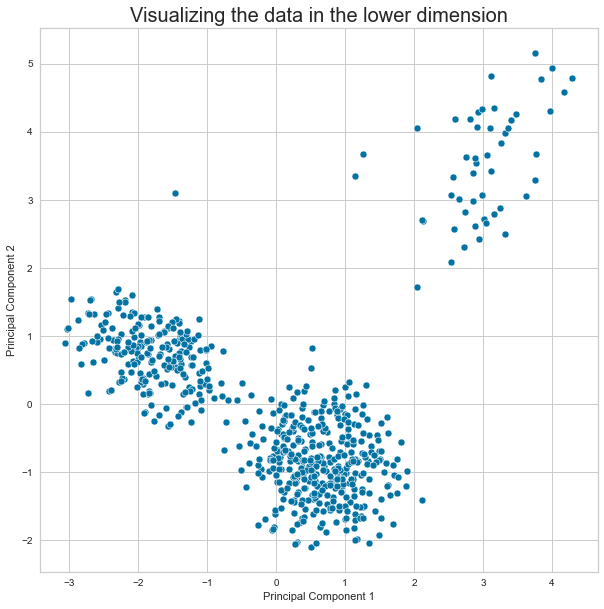

<IPython.core.display.Javascript object>

In [107]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=pca_df, x="Principal Component 1", y="Principal Component 2")
plt.title("Visualizing the data in the lower dimension", fontsize=20)
plt.show()

## Insights

- Very similar to Kmeans and Hierarchical Clustering  we see 3 differnt clusters in data
- We see 3 different clusters 
- We see a huge reduction in dimensions, from 5 to 2, and the 2 dimensions explain nearly `83.15%` of total variance in the data.


## Key findings  & Business Recommendations
### Actionable Insights & Recommendations

- We grouped customers into 3 different clusters. Customers grouped based on their credit limits, Number of credit cards own, Intrest in online banking or phone banking or visit bank in person.

- Cluster 2 consists of premium customers with very high credit limit, so focused marketing campaigns can be done to target customers with higher purchasing power for new credit card products. 

- Cluster 2 Customers like to do online banking a lot. Bank can target online marketing campaigns for these customers for new credit card products.

- Cluster 1 consists of customers with low credit limit and own less credit cards, Banks can promote new credit cards to these customers if they have good credit score. Cluster 1 customers calls bank more often to do phone banking. Bank can encorage Cluster 1 to do more online activities so that they can easily promote new online marketing campaigns for these customers for new credit card products, Also that would help reduce number of calls made to call centers.

- Cluster 0 consists of customers with mid range credit limit, Own 4 to 6 credit cards, Banks can promote new credit cards to these customers if they have good credit score. Cluster 1 customers vists bank more often than other 2 customer groups. Bank can encorage Cluster 0 to do more online activities so that they can easily promote new online marketing campaigns. 